In [1]:
import pandas as pd
import glob
from IPython.display import HTML
import numpy as np
#.reset_index(drop = True)
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.options.display.max_colwidth = None

In [2]:
import pandas as pd
 
## Crear un dataframe de ejemplo
data = {
    'Nombre': ['Juan', 'Ana', 'Juan', 'Ana', 'Juan', 'Ana'],
    'Asignatura': ['Matemáticas', 'Matemáticas', 'Física', 'Física', 'Química', 'Química'],
    'Puntuación': [85, 90, 78, 88, 92, 95]
}
 
df = pd.DataFrame(data)
 
## Aplicar groupby
agrupado = df.groupby('Nombre')
for nombre, grupo in agrupado:
    print("\n", nombre)
    print(grupo)


 Ana
  Nombre   Asignatura  Puntuación
1    Ana  Matemáticas          90
3    Ana       Física          88
5    Ana      Química          95

 Juan
  Nombre   Asignatura  Puntuación
0   Juan  Matemáticas          85
2   Juan       Física          78
4   Juan      Química          92


In [ ]:
df

In [ ]:
## Aplicar groupby en múltiples columnas
agrupado_multiple = df.groupby(['Nombre', 'Asignatura','Puntuación'])
for (nombre, asignatura,puntuacion), grupo in agrupado_multiple:
    print("\n", nombre, asignatura,puntuacion)
    print(grupo)

In [ ]:
## Groupby de datos no numéricos y conteo
agrupado_conteo = df.groupby('Nombre')['Asignatura'].count()
print(agrupado_conteo)

In [ ]:
## Usar sum con groupby
agrupado_suma = df.groupby('Nombre')['Puntuación'].sum()
print(agrupado_suma)

In [ ]:
## Ordenar datos después de groupby
agrupado_ordenado = df.groupby('Nombre')['Puntuación'].sum().sort_values(ascending=False)
print(agrupado_ordenado)

In [ ]:
## Agregación personalizada con groupby apply
agrupado_apply = df.groupby('Nombre')['Puntuación'].apply(lambda x: x.max() - x.min())
print(agrupado_apply)

In [ ]:
import pandas as pd
fruit_list = [ ('Orange', 34, 'Yes' ) ,
             ('Mango', 24, 'No' ) ,
             ('banana', 14, 'No' ) ,
             ('Apple', 44, 'Yes' ) ,
             ('Pineapple', 64, 'No') ,
             ('Kiwi', 84, 'Yes')  ]

df = pd.DataFrame(fruit_list, columns = ['Name' , 'Price', 'In_Stock']) 
display(df)
grouped_df = df.groupby('In_Stock')
print(grouped_df)
print(type(grouped_df))

In [ ]:
grouped_df.first()

In [ ]:
grouped_df.get_group('Yes')

In [ ]:
grouped_df.get_group('No')

In [ ]:
import pandas as pd
fruit_list = [ ('Orange', 34, 'Yes' ,'ABC') ,
             ('Mango', 24, 'No','ABC' ) ,
             ('banana', 14, 'No','ABC' ) ,
             ('Apple', 44, 'Yes',"XYZ" ) ,
             ('Pineapple', 64, 'No',"XYZ") ,
             ('Kiwi', 84, 'Yes',"XYZ")  ]

df = pd.DataFrame(fruit_list, columns = ['Name' , 'Price', 'In_Stock',"Supplier"]) 
display(df)
grouped_df = df.groupby(['In_Stock', 'Supplier']) 
  
grouped_df.first()

In [ ]:
grouped_df.first().index

In [ ]:
import pandas as pd

fruit_list = [
    ("Orange", 34, "Yes"),
    ("Mango", 24, "No"),
    ("banana", 14, "No"),
    ("Apple", 44, "Yes"),
    ("Pineapple", 64, "No"),
    ("Kiwi", 84, "Yes"),
]

df = pd.DataFrame(fruit_list, columns=["Name", "Price", "In_Stock"])
display(df)

grouped_df = df.groupby("In_Stock", as_index=True)

firtGroup = grouped_df.first()
print(firtGroup)
print(firtGroup.index)

print("---------")

grouped_df = df.groupby("In_Stock", as_index=False)

firtGroup = grouped_df.first()
print(firtGroup)
print(firtGroup.index)

In [3]:
path="/ProyectoTx/examenkavak/qqpp/"
headers=["PRODUCTO","PRESENTACION","MARCA","CATEGORIA","CATALOGO","PRECIO","FECHAREGISTRO","CADENACOMERCIAL","GIRO","NOMBRECOMERCIAL","DIRECCION","ESTADO","MUNICIPIO","LATITUD","LONGITUD"]
files = glob.glob(path + "*.csv", recursive = True)
df_union= pd.DataFrame([],columns=headers)

In [ ]:
files

In [ ]:
#sum=0
#for x in files:
 #   pivote = pd.read_csv(x, header = None)
  #  sum = sum +pivote.shape[0]
  #  print(pivote.shape)

In [ ]:
import pandas as pd

# Ruta del archivo CSV
archivo_csv = '/root/docsJupyter/examkavak/qqpp/2023/03-2023_02.csv'

# Función para verificar caracteres especiales en una cadena
def contiene_caracteres_especiales(cadena):
    caracteres_especiales = "!@#$%^&*()[]{};:,.<>?/\\|_~`"
    return any(caracter in caracteres_especiales for caracter in cadena)

# Lista para almacenar las líneas problemáticas
lineas_problematicas = []

# Abre el archivo CSV y verifica cada línea
with open(archivo_csv, 'r', encoding='utf-8') as archivo:
    lector_csv = csv.reader(archivo)
    for numero_linea, fila in enumerate(lector_csv, start=1):
        # Verifica si la fila contiene caracteres especiales
        for valor in fila:
            if contiene_caracteres_especiales(valor):
                lineas_problematicas.append((numero_linea, fila))
                break

# Muestra las líneas problemáticas
for numero_linea, fila in lineas_problematicas:
    print(f"Línea {numero_linea}: {fila}")

# Lee el archivo CSV con Pandas (puedes omitir las líneas problemáticas si lo deseas)
df = pd.read_csv(archivo_csv, skiprows=[linea[0] for linea in lineas_problematicas])


### Lectura  de datos local

In [4]:
for f in files:
        pivote= pd.DataFrame([])
        pivote = pd.read_csv(f,header = None)
        pivote.columns = headers
        df_union = pd.concat([df_union, pivote], ignore_index=True)
    
df_union.shape


(8745162, 15)

In [5]:
df_sin_duplicados = df_union.drop_duplicates()
df_sin_duplicados.shape

(8745162, 15)

In [7]:
df_esta = df_union[["CADENACOMERCIAL","GIRO","NOMBRECOMERCIAL","DIRECCION","ESTADO","MUNICIPIO","LATITUD","LONGITUD"]]

In [8]:
df_esta.shape

(8745162, 8)

In [9]:
df_esta_sin_dup = df_esta.drop_duplicates()
df_esta_sin_dup.shape

(1992, 8)

#### Analisis Exploratorio

In [10]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745162 entries, 0 to 8745161
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCTO         object 
 1   PRESENTACION     object 
 2   MARCA            object 
 3   CATEGORIA        object 
 4   CATALOGO         object 
 5   PRECIO           float64
 6   FECHAREGISTRO    object 
 7   CADENACOMERCIAL  object 
 8   GIRO             object 
 9   NOMBRECOMERCIAL  object 
 10  DIRECCION        object 
 11  ESTADO           object 
 12  MUNICIPIO        object 
 13  LATITUD          float64
 14  LONGITUD         float64
dtypes: float64(3), object(12)
memory usage: 1000.8+ MB


In [ ]:
#df_union.sample(1000).to_csv('Sample_datos.csv')

In [ ]:
#df_union.shape[0]

In [11]:
df_union

,PRODUCTO,PRESENTACION,MARCA,CATEGORIA,CATALOGO,PRECIO,FECHAREGISTRO,CADENACOMERCIAL,GIRO,NOMBRECOMERCIAL,DIRECCION,ESTADO,MUNICIPIO,LATITUD,LONGITUD
0,A.S.COR,"FRASCO GOTERO 24 ML. 1.000 G., SOLUCION GOTAS",S/M,MEDICAMENTOS,MEDICAMENTOS,389.0,2023-01-02,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECAS, COL. TROJES DE ALONSO, CP. 20116",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779
1,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.0,2023-01-02,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECAS, COL. TROJES DE ALONSO, CP. 20116",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779
2,ACEITE,BOTELLA 850 ML. VEGETAL,AVE,ACEITES Y GRASAS VEG. COMESTIBLES,PACIC,39.0,2023-01-02,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECAS, COL. TROJES DE ALONSO, CP. 20116",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779
3,ACEITE,BOTELLA 946 ML. CANOLA,CANOIL,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,50.9,2023-01-02,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECAS, COL. TROJES DE ALONSO, CP. 20116",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779
4,ACEITE,BOTELLA 840 ML. CANOLA,CAPULLO,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,73.9,2023-01-02,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECAS, COL. TROJES DE ALONSO, CP. 20116",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745157,YOGHURT,BOTE 1 KG. FRESA,YOPLAIT,DERIVADOS DE LECHE,BASICOS,42.0,2023-07-31,WAL-MART,SUPERMERCADO / TIENDA DE AUTOSERVICIO,WALMART SUCURSAL COLINAS DEL PADRE,"SIERRA MAPIMI 101, ESQ. CERRO AMECA, COL. COLINAS DEL PADRE, CP. 98085",ZACATECAS,ZACATECAS,22.743979,-102.588815
8745158,YOGHURT,ENVASE 220 GR. BEBIBLE. FRESA,YOPLAIT,DERIVADOS DE LECHE,BASICOS,10.0,2023-07-31,WAL-MART,SUPERMERCADO / TIENDA DE AUTOSERVICIO,WALMART SUCURSAL COLINAS DEL PADRE,"SIERRA MAPIMI 101, ESQ. CERRO AMECA, COL. COLINAS DEL PADRE, CP. 98085",ZACATECAS,ZACATECAS,22.743979,-102.588815
8745159,YOGHURT,VASO 125 GR. FRESA,YOPLAIT,DERIVADOS DE LECHE,BASICOS,6.0,2023-07-31,WAL-MART,SUPERMERCADO / TIENDA DE AUTOSERVICIO,WALMART SUCURSAL COLINAS DEL PADRE,"SIERRA MAPIMI 101, ESQ. CERRO AMECA, COL. COLINAS DEL PADRE, CP. 98085",ZACATECAS,ZACATECAS,22.743979,-102.588815
8745160,ZANAHORIA,1 KG. MEDIANA,S/M,HORTALIZAS FRESCAS,FRUTAS Y LEGUMBRES,16.9,2023-07-31,WAL-MART,SUPERMERCADO / TIENDA DE AUTOSERVICIO,WALMART SUCURSAL COLINAS DEL PADRE,"SIERRA MAPIMI 101, ESQ. CERRO AMECA, COL. COLINAS DEL PADRE, CP. 98085",ZACATECAS,ZACATECAS,22.743979,-102.588815


In [12]:
df_union.dtypes

PRODUCTO            object
PRESENTACION        object
MARCA               object
CATEGORIA           object
CATALOGO            object
PRECIO             float64
FECHAREGISTRO       object
CADENACOMERCIAL     object
GIRO                object
NOMBRECOMERCIAL     object
DIRECCION           object
ESTADO              object
MUNICIPIO           object
LATITUD            float64
LONGITUD           float64
dtype: object

In [ ]:
#df_union[['CADENACOMERCIAL','NOMBRECOMERCIAL']].sample(100)

In [ ]:
#df_union[df_union['CADENACOMERCIAL'] == 'WAL-MART']

In [ ]:
#df_union.sample(100)

In [13]:
def get_dic_values_unique_df(df_result):
    dic_val_uniq_by_col = {col: df_result[col].unique() for col in df_result.columns}
    dic_dfs_cat_result = {}
    for clave, valor in dic_val_uniq_by_col.items():
        dic_dfs_cat_result[f"df_{clave}"] = pd.DataFrame({clave: valor}, columns=[clave])
    return dic_dfs_cat_result

In [14]:
def get_dic_values_nunique_df(df_result):
    dic_val_nuniq_by_col = {col: df_result[col].nunique() for col in df_result.columns}
    return  dic_val_nuniq_by_col

In [15]:
dic_df_values_uni = get_dic_values_unique_df(df_union)

In [ ]:
#type(df_union['PRODUCTO'].nunique())

In [16]:
dic_df_values_number_uni = get_dic_values_nunique_df(df_union)
dic_df_values_number_uni

{'PRODUCTO': 775,
 'PRESENTACION': 3665,
 'MARCA': 1110,
 'CATEGORIA': 41,
 'CATALOGO': 11,
 'PRECIO': 41700,
 'FECHAREGISTRO': 147,
 'CADENACOMERCIAL': 253,
 'GIRO': 16,
 'NOMBRECOMERCIAL': 1883,
 'DIRECCION': 1977,
 'ESTADO': 30,
 'MUNICIPIO': 71,
 'LATITUD': 1764,
 'LONGITUD': 1762}

In [ ]:
dic_df_values_uni

In [ ]:
#df_cadena_comercial[df_cadena_comercial['CADENACOMERCIAL'] == 'WAL-MART']

In [ ]:
# relacion cadena comercial vs nombre comercial

In [ ]:
df_cadena_nombre = df_union[["CADENACOMERCIAL","NOMBRECOMERCIAL"]]
grouped_cadena_n  = df_cadena_nombre.groupby(["CADENACOMERCIAL","NOMBRECOMERCIAL"])
grouped_cadena_n

In [ ]:
grouped_df = df_cadena_nombre.groupby(["CADENACOMERCIAL", "NOMBRECOMERCIAL"]).agg(list).reset_index()
grouped_df.head(2)


In [ ]:
grouped_df.sample(200)

In [ ]:
specific_group = grouped_cadena_n.get_group(('7 ELEVEN', '7 ELEVEN'))
print(specific_group)

In [ ]:
### relacion c

In [ ]:
df_cadena_nombre = df_union[["GIRO","NOMBRECOMERCIAL"]]
grouped_cadena_n  = df_cadena_nombre.groupby(["GIRO","NOMBRECOMERCIAL"])
grouped_cadena_n.first()
#for group_name, group_data in grouped_cadena_n:
 #   print(group_name)
  #  print(group_data)

In [ ]:
#df_cadena_nombre = df_union[["PRODUCTO","MARCA","CATEGORIA","CATALOGO"]]
#grouped_cadena_n  = df_cadena_nombre.groupby(["PRODUCTO","MARCA","CATEGORIA","CATALOGO"])
#grouped_cadena_n
#for group_name, group_data in grouped_cadena_n:
#    print(group_name)
#    print(group_data)

### Relacion Producto

### Relacion Producto vs Categoria esta directamente relacionada 1:N 

In [17]:
df_rel_prod = df_union[["PRODUCTO","MARCA","CATEGORIA","CATALOGO"]]
grouped_rel_prod_vs_cat  = df_rel_prod.groupby(["PRODUCTO","CATEGORIA"])
grouped_rel_prod_vs_cat.first()

,,MARCA,CATALOGO
PRODUCTO,CATEGORIA,,
A.S.COR,MEDICAMENTOS,S/M,MEDICAMENTOS
ACARBOSA,MEDICAMENTOS,S/M,MEDICAMENTOS
ACEITE,ACEITES Y GRASAS VEG. COMESTIBLES,1-2-3,BASICOS
ACEITE DE OLIVA,PRODUCTOS DE TEMPORADA (NAVIDEÑOS),CARBONELL,BASICOS
ACEITUNA,PRODUCTOS DE TEMPORADA (NAVIDEÑOS),BUFALO,BASICOS
...,...,...,...
ZACTOS,MEDICAMENTOS,S/M,MEDICAMENTOS
ZANAHORIA,HORTALIZAS FRESCAS,S/M,FRUTAS Y LEGUMBRES
ZINNAT,MEDICAMENTOS,S/M,MEDICAMENTOS


In [18]:
df_grouped_rel_prod_vs_cat   = df_rel_prod.groupby(by=["PRODUCTO","CATEGORIA"],as_index=False)
df_prod_vs_cat = df_grouped_rel_prod_vs_cat.first()

In [19]:
df_prod_counts= df_prod_vs_cat['PRODUCTO'].value_counts().reset_index()
df_prod_counts.columns = ['Valor', 'Conteo']

In [20]:
df_prod_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,PULPO,2
2,CACAHUATES,2
3,MOJARRA,2
4,CAMARÓN,2
5,ATUN,2
...,...,...
265,ZACTOS,1
266,ZANAHORIA,1
267,ZINNAT,1
268,ZINTREPID,1


## Producto vs Categoria esta directamente relacionada 1:N y una Categoria vs Producto vs  esta directamente relacionada 1:N , es una relacion muchos a muchos

In [21]:
df_prod_vs_cat[(df_prod_vs_cat['PRODUCTO']== "PULPO") | (df_prod_vs_cat['PRODUCTO']== 'CACAHUATES') |(df_prod_vs_cat['PRODUCTO']== 'MOJARRA')|(df_prod_vs_cat['PRODUCTO']== 'CAMARÓN') |(df_prod_vs_cat['PRODUCTO']== 'ATUN')]

,PRODUCTO,CATEGORIA,MARCA,CATALOGO
66,ATUN,PESCADOS Y MARISCOS,S/M,PESCADOS Y MARISCOS
67,ATUN,PESCADOS Y MARISCOS EN CONSERVA,DOLORES,BASICOS
118,CACAHUATES,CHOCOLATES Y GOLOSINAS,SABRITAS,BASICOS
119,CACAHUATES,PRODUCTOS DE TEMPORADA (NAVIDEÑOS),S/M,FRUTAS Y LEGUMBRES
131,CAMARÓN,PESCADOS Y MARISCOS,S/M,PESCADOS Y MARISCOS
132,CAMARÓN,PESCADOS Y MARISCOS EN CONSERVA,S/M,PESCADOS Y MARISCOS
473,MOJARRA,PESCADOS Y MARISCOS,S/M,PESCADOS Y MARISCOS
474,MOJARRA,PESCADOS Y MARISCOS EN CONSERVA,S/M,PESCADOS Y MARISCOS
590,PULPO,PESCADOS Y MARISCOS,S/M,PESCADOS Y MARISCOS
591,PULPO,PESCADOS Y MARISCOS EN CONSERVA,S/M,PESCADOS Y MARISCOS


# Relacion Producto vs Catalogo

In [22]:
df_rel_prod = df_union[["PRODUCTO","MARCA","CATEGORIA","CATALOGO"]]
grouped_rel_prod_vs_cata  = df_rel_prod.groupby(["PRODUCTO","CATALOGO"])
grouped_rel_prod_vs_cata.first()

MARCA                          CATEGORIA
PRODUCTO  CATALOGO                                                     
A.S.COR   MEDICAMENTOS           S/M                       MEDICAMENTOS
ACARBOSA  MEDICAMENTOS           S/M                       MEDICAMENTOS
ACEITE    BASICOS              1-2-3  ACEITES Y GRASAS VEG. COMESTIBLES
          MERCADOS            CANOIL  ACEITES Y GRASAS VEG. COMESTIBLES
          PACIC                  AVE  ACEITES Y GRASAS VEG. COMESTIBLES
...                              ...                                ...
ZANAHORIA FRUTAS Y LEGUMBRES     S/M                 HORTALIZAS FRESCAS
          PACIC                  S/M                 HORTALIZAS FRESCAS
ZINNAT    MEDICAMENTOS           S/M                       MEDICAMENTOS
ZINTREPID MEDICAMENTOS           S/M                       MEDICAMENTOS
ZOFILIP   MEDICAMENTOS           S/M                       MEDICAMENTOS

[926 rows x 2 columns]

In [23]:
df_grouped_rel_prod_vs_cata   = df_rel_prod.groupby(by=["PRODUCTO","CATALOGO"],as_index=False)
df_prod_vs_cata = df_grouped_rel_prod_vs_cata.first()
df_prod_counts_cata= df_prod_vs_cata['PRODUCTO'].value_counts().reset_index()
df_prod_counts_cata.columns = ['Valor', 'Conteo']
df_prod_counts_cata.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,ATUN,4
13,PAN DE CAJA,3
23,FRIJOL,3
22,ACEITE,3
21,CARNE POLLO,3
...,...,...
342,REFRESH TEARS,1
343,REFRIGERADORES,1
344,REGLAS,1
345,REPRODUCTORES STREAMING,1


#### Un Producto vs Catalogo tienen relacion 1:N (un producto puede tener varios catalogos) y Un Catalogo puede estar asociado a varios Productos 1:N; relacion muchos a muchos

In [24]:
df_prod_vs_cata[(df_prod_vs_cata['PRODUCTO']== "ATUN") | (df_prod_vs_cata['PRODUCTO']== 'PAN DE CAJA') |(df_prod_vs_cata['PRODUCTO']== 'FRIJOL')|(df_prod_vs_cata['PRODUCTO']== 'ACEITE') |(df_prod_vs_cata['PRODUCTO']== 'CARNE POLLO')]

,PRODUCTO,CATALOGO,MARCA,CATEGORIA
2,ACEITE,BASICOS,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES
3,ACEITE,MERCADOS,CANOIL,ACEITES Y GRASAS VEG. COMESTIBLES
4,ACEITE,PACIC,AVE,ACEITES Y GRASAS VEG. COMESTIBLES
79,ATUN,BASICOS,DOLORES,PESCADOS Y MARISCOS EN CONSERVA
80,ATUN,MERCADOS,DOLORES,PESCADOS Y MARISCOS EN CONSERVA
81,ATUN,PACIC,HERDEZ,PESCADOS Y MARISCOS EN CONSERVA
82,ATUN,PESCADOS Y MARISCOS,S/M,PESCADOS Y MARISCOS EN CONSERVA
163,CARNE POLLO,BASICOS,S/M,CARNE DE AVE
164,CARNE POLLO,MERCADOS,S/M,CARNE DE AVE
165,CARNE POLLO,PACIC,BACHOCO,CARNE DE AVE


### Relacion Producto vs Marca

In [25]:
df_rel_prod = df_union[["PRODUCTO","MARCA","CATEGORIA","CATALOGO"]]
grouped_rel_prod_vs_marca  = df_rel_prod.groupby(["PRODUCTO","MARCA"])
grouped_rel_prod_vs_marca.first()

CATEGORIA            CATALOGO
PRODUCTO  MARCA                                                        
A.S.COR   S/M                          MEDICAMENTOS        MEDICAMENTOS
ACARBOSA  S/M                          MEDICAMENTOS        MEDICAMENTOS
ACEITE    1-2-3   ACEITES Y GRASAS VEG. COMESTIBLES             BASICOS
          AVE     ACEITES Y GRASAS VEG. COMESTIBLES               PACIC
          CANOIL  ACEITES Y GRASAS VEG. COMESTIBLES             BASICOS
...                                             ...                 ...
ZACTOS    S/M                          MEDICAMENTOS        MEDICAMENTOS
ZANAHORIA S/M                    HORTALIZAS FRESCAS  FRUTAS Y LEGUMBRES
ZINNAT    S/M                          MEDICAMENTOS        MEDICAMENTOS
ZINTREPID S/M                          MEDICAMENTOS        MEDICAMENTOS
ZOFILIP   S/M                          MEDICAMENTOS        MEDICAMENTOS

[2154 rows x 2 columns]

In [26]:
df_grouped_rel_prod_vs_marca   = df_rel_prod.groupby(by=["PRODUCTO","MARCA"],as_index=False)
df_prod_vs_marca = df_grouped_rel_prod_vs_marca.first()
df_prod_counts_marca= df_prod_vs_marca['PRODUCTO'].value_counts().reset_index()
df_prod_counts_marca.columns = ['Valor', 'Conteo']
df_prod_counts_marca.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,CUADERNO PROFESIONAL,58
1,ARROZ,29
2,LECHE ULTRAPASTEURIZADA,28
3,PAPEL HIGIENICO,28
4,JABON DE TOCADOR,25
...,...,...
413,POLVO P/HORNEAR,1
412,PRISTIQ,1
411,POLLO ROSTIZADO. TRADICIONAL,1
410,PLAYERA BLANCA,1


### Un producto puede tener varias marcas y una Marca puede estar asociada a varios productos, relacion muchos a muchos

In [27]:
df_prod_vs_marca[(df_prod_vs_marca['PRODUCTO']== "CUADERNO PROFESIONAL") | (df_prod_vs_marca['PRODUCTO']== 'ARROZ') |(df_prod_vs_marca['PRODUCTO']== 'LECHE ULTRAPASTEURIZADA')|(df_prod_vs_marca['PRODUCTO']== 'PAPEL HIGIENICO') |(df_prod_vs_marca['PRODUCTO']== 'JABON DE TOCADOR')]

,PRODUCTO,MARCA,CATEGORIA,CATALOGO
115,ARROZ,APRECIO,ARROZ Y CEREALES PREPARADOS,PACIC
116,ARROZ,AURRERA,ARROZ Y CEREALES PREPARADOS,PACIC
117,ARROZ,CHEDRAUI,ARROZ Y CEREALES PREPARADOS,BASICOS
118,ARROZ,DIAMANTE,ARROZ Y CEREALES PREPARADOS,PACIC
119,ARROZ,DIAMCERS,ARROZ Y CEREALES PREPARADOS,PACIC
...,...,...,...,...
1482,PAPEL HIGIENICO,REGIO. LUXURY,ARTS. DE PAPEL P/HIGIENE PERSONAL,BASICOS
1483,PAPEL HIGIENICO,SUAVEL,ARTS. DE PAPEL P/HIGIENE PERSONAL,BASICOS
1484,PAPEL HIGIENICO,SUAVEL. CON AROMA,ARTS. DE PAPEL P/HIGIENE PERSONAL,BASICOS
1485,PAPEL HIGIENICO,VELIA,ARTS. DE PAPEL P/HIGIENE PERSONAL,PACIC


#### Relacion Marca vs Producto

In [28]:
df_rel_prod = df_union[["PRODUCTO","MARCA","CATEGORIA","CATALOGO"]]
grouped_rel_prod_vs_marcap  = df_rel_prod.groupby(["MARCA","PRODUCTO"])
grouped_rel_prod_vs_marcap.first()

CATEGORIA  \
MARCA                    PRODUCTO                                                              
1 2 3                    DETERGENTE P/ROPA                 DETERGENTES Y PRODUCTOS SIMILARES   
1-2-3                    ACEITE                            ACEITES Y GRASAS VEG. COMESTIBLES   
120. SANTA RITA          VINO DE MESA                                        VINOS Y LICORES   
3 MINUTOS                AVENA                                   ARROZ Y CEREALES PREPARADOS   
3M NEXCARE. COLDHOT      BOLSA REUTILIZABLE CALIENTE/FRÍO                       MEDICAMENTOS   
...                                                                                      ...   
ZWAN. PREMIUM            JAMON                                CARNES FRIAS SECAS Y EMBUTIDOS   
                         QUESO MANCHEGO                                   DERIVADOS DE LECHE   
                         QUESO PANELA                                     DERIVADOS DE LECHE   
                         SALCHICHA                            CARNES FRIAS SECAS Y EMBUTIDOS   
ÍNTIMA. BY PRO-SELECTION TOALLA FEMENINA                   ARTS. DE PAPEL P/HIGIENE PERSONAL   

                                                               CATALOGO  
MARCA                    PRODUCTO                                        
1 2 3                    DETERGENTE P/ROPA                      BASICOS  
1-2-3                    ACEITE                                 BASICOS  
120. SANTA RITA          VINO DE MESA                         NAVIDEÑOS  
3 MINUTOS                AVENA                                  BASICOS  
3M NEXCARE. COLDHOT      BOLSA REUTILIZABLE CALIENTE/FRÍO  MEDICAMENTOS  
...                                                                 ...  
ZWAN. PREMIUM            JAMON                                  BASICOS  
                         QUESO MANCHEGO                         BASICOS  
                         QUESO PANELA                           BASICOS  
                         SALCHICHA                              BASICOS  
ÍNTIMA. BY PRO-SELECTION TOALLA FEMENINA                          PACIC  

[2154 rows x 2 columns]

In [29]:
df_grouped_rel_prod_vs_marcap   = df_rel_prod.groupby(by=["MARCA","PRODUCTO"],as_index=False)
df_prod_vs_marcap = df_grouped_rel_prod_vs_marcap.first()
df_prod_counts_marcap= df_prod_vs_marcap['MARCA'].value_counts().reset_index()
df_prod_counts_marcap.columns = ['Valor', 'Conteo']
df_prod_counts_marcap.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,S/M,525
1,PRECISSIMO,18
2,LA COSTEÑA,16
3,CHEDRAUI,15
4,GREAT VALUE,13
...,...,...
510,SCRIBE. ECOLOGICO. 3803,1
511,SCRIBE. ECOLÓGICO. 2233,1
512,SCRIBE. ELEMENTAL-D,1
513,SCRIBE. EMOJI. 7223,1


In [30]:
df_prod_vs_marcap[(df_prod_vs_marcap['MARCA']== "S/M") | (df_prod_vs_marcap['MARCA']== 'PRECISSIMO') |(df_prod_vs_marcap['MARCA']== 'LA COSTEÑA')|(df_prod_vs_marcap['MARCA']== 'CHEDRAUI') |(df_prod_vs_marcap['MARCA']== 'GREAT VALUE')]

,MARCA,PRODUCTO,CATEGORIA,CATALOGO
215,CHEDRAUI,ACEITE,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS
216,CHEDRAUI,ARROZ,ARROZ Y CEREALES PREPARADOS,BASICOS
217,CHEDRAUI,AZUCAR,AZUCAR,BASICOS
218,CHEDRAUI,CAFE SOLUBLE,CAFE,BASICOS
219,CHEDRAUI,FRIJOL,LEGUMBRES SECAS,BASICOS
...,...,...,...,...
1764,S/M,ZACTOS,MEDICAMENTOS,MEDICAMENTOS
1765,S/M,ZANAHORIA,HORTALIZAS FRESCAS,FRUTAS Y LEGUMBRES
1766,S/M,ZINNAT,MEDICAMENTOS,MEDICAMENTOS
1767,S/M,ZINTREPID,MEDICAMENTOS,MEDICAMENTOS


# Relacion Producto vs Presentacion

In [31]:
### Relacion Producto vs Categoria 
df_rel_prod = df_union[["PRODUCTO","PRESENTACION","MARCA","CATEGORIA","CATALOGO"]]
grouped_rel_prod_vs_pres  = df_rel_prod.groupby(["PRODUCTO","PRESENTACION"])
grouped_rel_prod_vs_pres.first()


MARCA  \
PRODUCTO  PRESENTACION                                             
A.S.COR   FRASCO GOTERO 24 ML. 1.000 G., SOLUCION GOTAS      S/M   
ACARBOSA  CAJA CON 30 TABLETAS DE 50 MG.                     S/M   
ACEITE    BOTELLA 1 LT. MIXTO                            CRISTAL   
          BOTELLA 1 LT. VEGETAL                            1-2-3   
          BOTELLA 500 ML. MIXTO                            1-2-3   
...                                                          ...   
ZANAHORIA 1 KG. MEDIANA                                      S/M   
          1 KG. MEDIANA. EN BOLSA                            S/M   
ZINNAT    CAJA CON 10 TABLETAS DE 500 MG.                    S/M   
ZINTREPID CAJA CON 28 COMPRIMIDOS DE 10 MG./ 20 MG.          S/M   
ZOFILIP   CAJA CON 30 TABLETAS DE 200 MG./ 20 MG.            S/M   

                                                                                 CATEGORIA  \
PRODUCTO  PRESENTACION                                                                       
A.S.COR   FRASCO GOTERO 24 ML. 1.000 G., SOLUCION GOTAS                       MEDICAMENTOS   
ACARBOSA  CAJA CON 30 TABLETAS DE 50 MG.                                      MEDICAMENTOS   
ACEITE    BOTELLA 1 LT. MIXTO                            ACEITES Y GRASAS VEG. COMESTIBLES   
          BOTELLA 1 LT. VEGETAL                          ACEITES Y GRASAS VEG. COMESTIBLES   
          BOTELLA 500 ML. MIXTO                          ACEITES Y GRASAS VEG. COMESTIBLES   
...                                                                                    ...   
ZANAHORIA 1 KG. MEDIANA                                                 HORTALIZAS FRESCAS   
          1 KG. MEDIANA. EN BOLSA                                       HORTALIZAS FRESCAS   
ZINNAT    CAJA CON 10 TABLETAS DE 500 MG.                                     MEDICAMENTOS   
ZINTREPID CAJA CON 28 COMPRIMIDOS DE 10 MG./ 20 MG.                           MEDICAMENTOS   
ZOFILIP   CAJA CON 30 TABLETAS DE 200 MG./ 20 MG.                             MEDICAMENTOS   

                                                                   CATALOGO  
PRODUCTO  PRESENTACION                                                       
A.S.COR   FRASCO GOTERO 24 ML. 1.000 G., SOLUCION GOTAS        MEDICAMENTOS  
ACARBOSA  CAJA CON 30 TABLETAS DE 50 MG.                       MEDICAMENTOS  
ACEITE    BOTELLA 1 LT. MIXTO                                       BASICOS  
          BOTELLA 1 LT. VEGETAL                                     BASICOS  
          BOTELLA 500 ML. MIXTO                                    MERCADOS  
...                                                                     ...  
ZANAHORIA 1 KG. MEDIANA                                  FRUTAS Y LEGUMBRES  
          1 KG. MEDIANA. EN BOLSA                                     PACIC  
ZINNAT    CAJA CON 10 TABLETAS DE 500 MG.                      MEDICAMENTOS  
ZINTREPID CAJA CON 28 COMPRIMIDOS DE 10 MG./ 20 MG.            MEDICAMENTOS  
ZOFILIP   CAJA CON 30 TABLETAS DE 200 MG./ 20 MG.              MEDICAMENTOS  

[3856 rows x 3 columns]

In [32]:
df_grouped_rel_prod_vs_pres   = df_rel_prod.groupby(by=["PRODUCTO","PRESENTACION"],as_index=False)
df_prod_vs_pres = df_grouped_rel_prod_vs_pres.first()
df_prod_counts= df_prod_vs_pres['PRODUCTO'].value_counts().reset_index()
df_prod_counts.columns = ['Valor', 'Conteo']
df_prod_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,VARIOS,127
1,PANTALLAS,73
2,MUÑECAS,69
3,JUEGOS DE MESA,65
4,LAVADORAS,59
...,...,...
501,SERETIDE DISKUS,1
500,SERMION,1
499,SERTRALINA,1
498,SALBUTAMOL,1


### Un producto puede tener varias presentaciones uno a muchos 1:N

In [33]:
df_prod_vs_pres[(df_prod_vs_cat['PRODUCTO']== "VARIOS") | (df_prod_vs_pres['PRODUCTO']== 'PANTALLAS') |(df_prod_vs_pres['PRODUCTO']== 'MUÑECAS')|(df_prod_vs_pres['PRODUCTO']== 'JUEGOS DE MESA') |(df_prod_vs_pres['PRODUCTO']== 'LAVADORAS')]

,PRODUCTO,PRESENTACION,MARCA,CATEGORIA,CATALOGO
751,CHILE SECO,1 KG. GRANEL. ANCHO,S/M,LEGUMBRES SECAS,MERCADOS
1735,JUEGOS DE MESA,#6055930. HEDBANZ. HARRY POTTER,SPIN MASTER,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
1736,JUEGOS DE MESA,"#6060205. HEDBANZ. EL JUEGO DE PREGUNTAS RÁPIDAS "" ¡QUÉ SOY?""",SPIN MASTER,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
1737,JUEGOS DE MESA,43535. UNO STACKO,MATTEL/GAMES,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
1738,JUEGOS DE MESA,52563. MONOS LOCOS,MATTEL/GAMES,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
...,...,...,...,...,...
2403,MUÑECAS,HGY88. BARBIE. YOU CAN BE ANYTHING. DIVERSIÓN EN LA GRANJA,MATTEL,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
2404,MUÑECAS,HHB70. BARBIE. KITTY CONDO,MATTEL,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
2405,MUÑECAS,"HHG60. BARBIE. BOTE, MUÑECAS Y ACCESORIOS",MATTEL,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
2406,MUÑECAS,HHX64. BARBIE. RISE & RELAX,MATTEL,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES


# Presentacion vs Producto

In [34]:
### Relacion Producto vs Categoria 
df_rel_prod = df_union[["PRODUCTO","PRESENTACION","MARCA","CATEGORIA","CATALOGO"]]
grouped_rel_prod_vs_presp  = df_rel_prod.groupby(["PRESENTACION","PRODUCTO"])
grouped_rel_prod_vs_presp.first()

,,MARCA,CATEGORIA,CATALOGO
PRESENTACION,PRODUCTO,,,
# 6061056. PAW PATROL. TOTAL CITY RESCUE SET,AUTOPISTAS,SPIN MASTER,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
#6044952. MONSTER JAM. MEGALODON R/C (ESCALA 1:24),MOTOS Y CARROS ELÉCTRICOS,SPIN MASTER,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
#6044955. MONSTER JAM. GRAVE DIGGER R/C (ESCALA 1:24),MOTOS Y CARROS ELÉCTRICOS,SPIN MASTER,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
#6054190. PAW PATROL. CHASE RC POLICE CRUSIER O MARSHALL RC FIRETRUCK,MOTOS Y CARROS ELÉCTRICOS,SPIN MASTER,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
#6054195. PAW PATROL. R/C. MARSHALL RC FIRE TRUCK O CHASE RC POLICE CRUISER,MOTOS Y CARROS ELÉCTRICOS,SPIN MASTER,ARTS. DE ESPARCIMIENTO (JUGUETES),JUGUETES
...,...,...,...,...
ZE3708MX. EXTRACTOR,EXTRACTORES DE JUGOS Y EXPRIMIDORES,T-FAL. FRUTELIA PLUS,APARATOS ELECTRICOS,ELECTRODOMESTICOS
ZE420DMX. EXTRACTOR,EXTRACTORES DE JUGOS Y EXPRIMIDORES,T-FAL. FRUTELIA PLUS,APARATOS ELECTRICOS,ELECTRODOMESTICOS
ZE550DMX. EXTRACTOR,EXTRACTORES DE JUGOS Y EXPRIMIDORES,T-FAL. JUICE EXPRESS,APARATOS ELECTRICOS,ELECTRODOMESTICOS


In [35]:
df_grouped_rel_prod_vs_presp   = df_rel_prod.groupby(by=["PRODUCTO","PRESENTACION"],as_index=False)
df_prod_vs_presp = df_grouped_rel_prod_vs_presp.first()
df_prod_counts_presp= df_prod_vs_presp["PRESENTACION"].value_counts().reset_index()
df_prod_counts_presp.columns = ['Valor', 'Conteo']
df_prod_counts_presp.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,1 KG. GRANEL,26
1,1 KG.,21
2,1 KG. ENTERO. FRESCO,16
3,BOTELLA 1 LT.,6
4,BOLSA 500 GR. HORTALIZAS CONGELADAS,6
...,...,...
1284,XBOX. SERIES X. F1 22,1
1285,XBOX. SERIES X. NBA 2K 23,1
1286,BOTELLA 750 ML. TINTO. NEBBIOLO. RESERVA PRIVADA,1
1287,BOTELLA 1 LT. BLANCO ALCOHOL CANA,1


### Una presentacion esta asociada a varios productos 1:N, relacion muchos a muchos

In [36]:
df_presprod= df_prod_vs_presp[(df_prod_vs_presp['PRESENTACION']== "1 KG. GRANEL") | (df_prod_vs_presp['PRESENTACION']== '1 KG.') |(df_prod_vs_presp['PRESENTACION']== '1 KG. ENTERO. FRESCO')|(df_prod_vs_presp['PRESENTACION']== 'BOTELLA 1 LT.') |(df_prod_vs_presp['PRESENTACION']== 'BOLSA 500 GR. HORTALIZAS CONGELADAS')]

In [37]:
df_presprod.columns

Index(['PRODUCTO', 'PRESENTACION', 'MARCA', 'CATEGORIA', 'CATALOGO'], dtype='object')

In [38]:
df_presprod= df_presprod[['PRESENTACION','PRODUCTO', 'MARCA', 'CATEGORIA', 'CATALOGO']].sort_values(by='PRESENTACION')

df_presprod

### Relacion NombreComercial vs CadenaComercial

In [39]:
df_rel_prod = df_union[['NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_namecomercial_cadena  = df_rel_prod.groupby(['NOMBRECOMERCIAL','CADENACOMERCIAL'])
grouped_rel_namecomercial_cadena.first()

,,GIRO,DIRECCION,ESTADO,MUNICIPIO,LATITUD,LONGITUD
NOMBRECOMERCIAL,CADENACOMERCIAL,,,,,,
7 ELEVEN,7 ELEVEN,TIENDA DE CONVENIENCIA,"ATLIXCO 165, ESQ. ALFONSO REYES, COL. HIPODROMO CONDESA, CP. 06170",CIUDAD DE MÉXICO,CUAUHTÉMOC,19.408894,-99.176846
7 ELEVEN SUCUESAL 2097,7 ELEVEN,TIENDA DE CONVENIENCIA,"EMILIANO ZAPATA 914, ESQ. PALMAS NTE., COL. BELLAVISTA, CP. 66450",MORELOS,CUERNAVACA,18.961343,-99.246176
7 ELEVEN SUCURSAL 549 AGUIRRE PEQUEÑO,7 ELEVEN,TIENDA DE CONVENIENCIA,"AGUIRRE PEQUEÑO 1300 L-3 Y 4, ESQ. IRAPUATO, COL. MITRAS CENTRO , CP. 64460",NUEVO LEÓN,MONTERREY,25.689806,-100.346955
7 ELEVEN SUCURSAL PABLO NERUDA,7 ELEVEN,TIENDA DE CONVENIENCIA,"RUBEN DARIO, ESQ. PABLO NERUDA, COL. PROVIDENCIA SECTOR HIDALGO, CP. 45110",JALISCO,GUADALAJARA,20.697360,-103.382544
7 ELEVEN SUCURSAL SIMÓN BOLÍVAR,7 ELEVEN,TIENDA DE CONVENIENCIA,"AV.SIMÓN BOLÍVAR 1248, ENTRE AV.MOISÉS SAÉNZ Y CALLE CELAYA, COL. MITRAS CENTRO, CP. 64460",NUEVO LEÓN,MONTERREY,25.690242,-100.344364
...,...,...,...,...,...,...,...
ZAPATERIAS EL GRILLITO CANTOR SUCURSAL MATRIZ,ZAPATERIAS,ZAPATERÍAS,"HIDALGO 283, ENTRE ARISTA Y JULIAN DE LOS REYES, COL. CENTRO, CP. 78000",SAN LUIS POTOSÍ,SAN LUIS POTOSÍ,22.153827,-100.976422
ZAPATERIAS MONTSERRAT SUCURSAL 05,ZAPATERIAS,ZAPATERÍAS,"ARTEAGA 13, ESQ. GUERRERO, COL. CENTRO, CP. 62000",MORELOS,CUERNAVACA,18.923462,-99.234039
ZAPATERIAS PAKAR,ZAPATERIA PAKAR,ZAPATERÍAS,"GUERRERO 22, ESQ. ARTEAGA, COL. CENTRO, CP. 62000",MORELOS,CUERNAVACA,18.923734,-99.234998


In [40]:
df_grouped_rel_namecomercial_cadena  = df_rel_prod.groupby(by=['NOMBRECOMERCIAL','CADENACOMERCIAL'],as_index=False)
df_namecomercial_cadena= df_grouped_rel_namecomercial_cadena.first()
df_namecomercial_cad_counts= df_namecomercial_cadena['NOMBRECOMERCIAL'].value_counts().reset_index()
df_namecomercial_cad_counts.columns = ['Valor', 'Conteo']
df_namecomercial_cad_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,DEL SOL,2
1251,ABARROTES ECO,1
1263,7 ELEVEN SUCURSAL SIMÓN BOLÍVAR,1
1262,7 ELEVEN SUCURSAL VICENTE SUAREZ,1
1261,7 ELEVEN SUCURSAL YAUTEPEC,1
...,...,...
623,ZAPATERIAS PAKAR,1
622,ZORRO SUCURSAL ZQ6,1
621,WALMART SUCURSAL TAMPICO,1
620,WALMART SUCURSAL SUPER PLAZA ECATEPEC,1


### Un nombre comercial puede estar asociado a mas de 1 cadema comercial1:N

In [41]:
df_namecomercial_cadena[(df_namecomercial_cadena['NOMBRECOMERCIAL']== "DEL SOL") |(df_namecomercial_cadena['NOMBRECOMERCIAL']== 'ABARROTES ECO')]

,NOMBRECOMERCIAL,CADENACOMERCIAL,GIRO,DIRECCION,ESTADO,MUNICIPIO,LATITUD,LONGITUD
16,ABARROTES ECO,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,"NUEZ 2140, ENTRE MANDARINA Y AV. DEL MERCADO (MERCADO DE ABASTOS), COL. JARDINES DE LA CRUZ, CP. 44950",JALISCO,GUADALAJARA,20.650348,-103.381964
290,DEL SOL,DEL SOL,UNIFORMES,"MADERO PTE. 18, ENTRE JUAREZ Y ALLENDE, COL. CENTRO, CP. 76000",QUERÉTARO,SANTIAGO DE QUERÉTARO,20.592269,-100.392821
291,DEL SOL,DEPARTAMENTAL DEL SOL,TIENDA DE ELECTRODOMÉSTICOS,"AV. FRANCISCO I. MADERO 905, ESQ. PEDRO FUENTES, COL. CENTRO, CP. 86000",TABASCO,CENTRO,17.995431,-92.916171


### Relacion CadenaComercial vs NombreComercial

### Una cadena CadenaComercial esta asociada a diferentes Nombres Comerciales

In [42]:
df_rel_prod = df_union[['NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_cadena_namecomercial  = df_rel_prod.groupby(['CADENACOMERCIAL','NOMBRECOMERCIAL'])
grouped_rel_cadena_namecomercial.first()

GIRO  \
CADENACOMERCIAL       NOMBRECOMERCIAL                                                         
7 ELEVEN              7 ELEVEN                                       TIENDA DE CONVENIENCIA   
                      7 ELEVEN SUCUESAL 2097                         TIENDA DE CONVENIENCIA   
                      7 ELEVEN SUCURSAL 549 AGUIRRE PEQUEÑO          TIENDA DE CONVENIENCIA   
                      7 ELEVEN SUCURSAL PABLO NERUDA                 TIENDA DE CONVENIENCIA   
                      7 ELEVEN SUCURSAL SIMÓN BOLÍVAR                TIENDA DE CONVENIENCIA   
...                                                                                     ...   
ZAPATERIAS            ZAPATERIA NADDAL SUCURSAL SAN ANGEL                        ZAPATERÍAS   
                      ZAPATERIA RODRIGUEZ SUCURSAL CENTRO                        ZAPATERÍAS   
                      ZAPATERIAS EL GRILLITO CANTOR SUCURSAL MATRIZ              ZAPATERÍAS   
                      ZAPATERIAS MONTSERRAT SUCURSAL 05                          ZAPATERÍAS   
ZAPATERIAS 3 HERMANOS ZAPATERIA 3 HERMANOS SUCURSAL CENTRO                       ZAPATERÍAS   

                                                                                                                                                      DIRECCION  \
CADENACOMERCIAL       NOMBRECOMERCIAL                                                                                                                             
7 ELEVEN              7 ELEVEN                                                               ATLIXCO 165, ESQ. ALFONSO REYES, COL. HIPODROMO CONDESA, CP. 06170   
                      7 ELEVEN SUCUESAL 2097                                                  EMILIANO ZAPATA 914, ESQ. PALMAS NTE., COL. BELLAVISTA, CP. 66450   
                      7 ELEVEN SUCURSAL 549 AGUIRRE PEQUEÑO                         AGUIRRE PEQUEÑO 1300 L-3 Y 4, ESQ. IRAPUATO, COL. MITRAS CENTRO , CP. 64460   
                      7 ELEVEN SUCURSAL PABLO NERUDA                                 RUBEN DARIO, ESQ. PABLO NERUDA, COL. PROVIDENCIA SECTOR HIDALGO, CP. 45110   
                      7 ELEVEN SUCURSAL SIMÓN BOLÍVAR                AV.SIMÓN BOLÍVAR 1248, ENTRE AV.MOISÉS SAÉNZ Y CALLE CELAYA, COL. MITRAS CENTRO, CP. 64460   
...                                                                                                                                                         ...   
ZAPATERIAS            ZAPATERIA NADDAL SUCURSAL SAN ANGEL                                    DR. GALVEZ 14, CASI ESQ. AV. REVOLUCION, COL. SAN ANGEL, CP. 01000   
                      ZAPATERIA RODRIGUEZ SUCURSAL CENTRO                           EMILIANO CARRANZA 307, ENTRE BENITO JUAREZ Y ADUANA, COL. CENTRO, CP. 89000   
                      ZAPATERIAS EL GRILLITO CANTOR SUCURSAL MATRIZ                     HIDALGO 283, ENTRE ARISTA Y JULIAN DE LOS REYES, COL. CENTRO, CP. 78000   
                      ZAPATERIAS MONTSERRAT SUCURSAL 05                                                       ARTEAGA 13, ESQ. GUERRERO, COL. CENTRO, CP. 62000   
ZAPATERIAS 3 HERMANOS ZAPATERIA 3 HERMANOS SUCURSAL CENTRO                         CALLE PRIMERA PTE. SUR 77, ESQ. AV. TERCERA SUR PTE., COL. CENTRO, CP. 29000   

                                                                               ESTADO  \
CADENACOMERCIAL       NOMBRECOMERCIAL                                                   
7 ELEVEN              7 ELEVEN                                       CIUDAD DE MÉXICO   
                      7 ELEVEN SUCUESAL 2097                                  MORELOS   
                      7 ELEVEN SUCURSAL 549 AGUIRRE PEQUEÑO                NUEVO LEÓN   
                      7 ELEVEN SUCURSAL PABLO NERUDA                          JALISCO   
                      7 ELEVEN SUCURSAL SIMÓN BOLÍVAR                      NUEVO LEÓN   
...                                                                               ...   
ZAPATERIAS         

In [43]:
df_grouped_rel_cadena_namecomercial  = df_rel_prod.groupby(by=['CADENACOMERCIAL','NOMBRECOMERCIAL'],as_index=False)
df_cadena_namecomercial= df_grouped_rel_cadena_namecomercial.first()
df_cadena_namecomercial_counts = df_cadena_namecomercial['CADENACOMERCIAL'].value_counts().reset_index()
df_cadena_namecomercial_counts.columns = ['Valor', 'Conteo']
df_cadena_namecomercial_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,TORTILLERIAS TRADICIONALES,494
1,CENTRAL DE ABASTOS,213
2,MERCADO PUBLICO,64
3,WAL-MART,59
4,COPPEL,54
...,...,...
143,PESCADERIA YURIDIA,1
144,UNIFORMES NOVEDADES GLER,1
145,UNIFORMES MARINES,1
146,PESCADOS Y MARISCOS MIRAMAR,1


In [44]:
df_cadena_namecomercial[(df_cadena_namecomercial['CADENACOMERCIAL']== "PULPO") | (df_cadena_namecomercial['CADENACOMERCIAL']== 'CACAHUATES') |(df_cadena_namecomercial['CADENACOMERCIAL']== 'MOJARRA')|(df_cadena_namecomercial['CADENACOMERCIAL']== 'CAMARÓN') |(df_cadena_namecomercial['CADENACOMERCIAL']== 'ATUN')]

,CADENACOMERCIAL,NOMBRECOMERCIAL,GIRO,DIRECCION,ESTADO,MUNICIPIO,LATITUD,LONGITUD


### Relacion NombreComercial vs Giro

In [45]:
df_rel_prod = df_union[['NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_namecomercial_giro  = df_rel_prod.groupby(['NOMBRECOMERCIAL','GIRO'])
grouped_rel_namecomercial_giro.first()

,,CADENACOMERCIAL,DIRECCION,ESTADO,MUNICIPIO,LATITUD,LONGITUD
NOMBRECOMERCIAL,GIRO,,,,,,
7 ELEVEN,TIENDA DE CONVENIENCIA,7 ELEVEN,"ATLIXCO 165, ESQ. ALFONSO REYES, COL. HIPODROMO CONDESA, CP. 06170",CIUDAD DE MÉXICO,CUAUHTÉMOC,19.408894,-99.176846
7 ELEVEN SUCUESAL 2097,TIENDA DE CONVENIENCIA,7 ELEVEN,"EMILIANO ZAPATA 914, ESQ. PALMAS NTE., COL. BELLAVISTA, CP. 66450",MORELOS,CUERNAVACA,18.961343,-99.246176
7 ELEVEN SUCURSAL 549 AGUIRRE PEQUEÑO,TIENDA DE CONVENIENCIA,7 ELEVEN,"AGUIRRE PEQUEÑO 1300 L-3 Y 4, ESQ. IRAPUATO, COL. MITRAS CENTRO , CP. 64460",NUEVO LEÓN,MONTERREY,25.689806,-100.346955
7 ELEVEN SUCURSAL PABLO NERUDA,TIENDA DE CONVENIENCIA,7 ELEVEN,"RUBEN DARIO, ESQ. PABLO NERUDA, COL. PROVIDENCIA SECTOR HIDALGO, CP. 45110",JALISCO,GUADALAJARA,20.697360,-103.382544
7 ELEVEN SUCURSAL SIMÓN BOLÍVAR,TIENDA DE CONVENIENCIA,7 ELEVEN,"AV.SIMÓN BOLÍVAR 1248, ENTRE AV.MOISÉS SAÉNZ Y CALLE CELAYA, COL. MITRAS CENTRO, CP. 64460",NUEVO LEÓN,MONTERREY,25.690242,-100.344364
...,...,...,...,...,...,...,...
ZAPATERIAS EL GRILLITO CANTOR SUCURSAL MATRIZ,ZAPATERÍAS,ZAPATERIAS,"HIDALGO 283, ENTRE ARISTA Y JULIAN DE LOS REYES, COL. CENTRO, CP. 78000",SAN LUIS POTOSÍ,SAN LUIS POTOSÍ,22.153827,-100.976422
ZAPATERIAS MONTSERRAT SUCURSAL 05,ZAPATERÍAS,ZAPATERIAS,"ARTEAGA 13, ESQ. GUERRERO, COL. CENTRO, CP. 62000",MORELOS,CUERNAVACA,18.923462,-99.234039
ZAPATERIAS PAKAR,ZAPATERÍAS,ZAPATERIA PAKAR,"GUERRERO 22, ESQ. ARTEAGA, COL. CENTRO, CP. 62000",MORELOS,CUERNAVACA,18.923734,-99.234998


In [46]:
df_grouped_rel_namecomercial_giro  = df_rel_prod.groupby(by=['NOMBRECOMERCIAL','GIRO'],as_index=False)
df_namecomercial_giro= df_grouped_rel_namecomercial_giro.first()
df_namecomercial_giro_counts = df_namecomercial_giro['NOMBRECOMERCIAL'].value_counts().reset_index()
df_namecomercial_giro_counts.columns = ['Valor', 'Conteo']
df_namecomercial_giro_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,DEL SOL,2
1,SIN NOMBRE SUCURSAL ÚNICA (IZTAPALAPA),2
1881,LA TEXANA (IZTAPALAPA),1
1250,ABARROTES HERMANOS NAVA SUCURSAL MERCADO FCO. VILLA,1
1262,7 ELEVEN SUCURSAL VICENTE SUAREZ,1
...,...,...
623,ZAPATERIAS PAKAR,1
622,ZORRO SUCURSAL ZQ6,1
621,WALMART SUCURSAL TAMPICO,1
620,WALMART SUCURSAL SUPER PLAZA ECATEPEC,1


#### El mismo Nombre Comercial piede tener mas de 1 Giro asociado, uno a muchos 1:N, al final tenemos relacion muchos a muchos

In [47]:
df_namecomercial_giro[ (df_namecomercial_giro['NOMBRECOMERCIAL']== 'DEL SOL') |(df_namecomercial_giro['NOMBRECOMERCIAL']== 'SIN NOMBRE SUCURSAL ÚNICA (IZTAPALAPA)')]

,NOMBRECOMERCIAL,GIRO,CADENACOMERCIAL,DIRECCION,ESTADO,MUNICIPIO,LATITUD,LONGITUD
290,DEL SOL,TIENDA DE ELECTRODOMÉSTICOS,DEPARTAMENTAL DEL SOL,"AV. FRANCISCO I. MADERO 905, ESQ. PEDRO FUENTES, COL. CENTRO, CP. 86000",TABASCO,CENTRO,17.995431,-92.916171
291,DEL SOL,UNIFORMES,DEL SOL,"MADERO PTE. 18, ENTRE JUAREZ Y ALLENDE, COL. CENTRO, CP. 76000",QUERÉTARO,SANTIAGO DE QUERÉTARO,20.592269,-100.392821
1155,SIN NOMBRE SUCURSAL ÚNICA (IZTAPALAPA),CENTRAL DE ABASTO,CENTRAL DE ABASTOS,"CANAL DE RÍO CHURUBUSCO S/N, P/2 C-D LOCAL 38, INT. CENTRAL DE ABASTO, COL. CENTRAL DE ABASTO, CP. 09040",CIUDAD DE MÉXICO,IZTAPALAPA,19.374240,-99.090289
1156,SIN NOMBRE SUCURSAL ÚNICA (IZTAPALAPA),FRUTAS Y LEGUMBRES,CENTRAL DE ABASTOS,"CANAL DE RÍO CHURUBUSCO S/N, BODEGA I 55, INT. CENTRAL DE ABASTO, COL. CENTRAL DE ABASTO, CP. 09040",CIUDAD DE MÉXICO,IZTAPALAPA,19.374240,-99.090289


### Relacion Giro vs NombreComercial

#### Un Giro puede estas asociado a difernetes Nombres Comerciles 1:N , relacion uno a muchos

In [48]:
df_rel_prod = df_union[['NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_giro_namecomercial  = df_rel_prod.groupby(['GIRO','NOMBRECOMERCIAL'])
grouped_rel_giro_namecomercial.first()

CADENACOMERCIAL  \
GIRO                 NOMBRECOMERCIAL                                                     
CARNE DE RES Y CERDO EL RINCÓN TAPATÍO (IZTAPALAPA)                 CENTRAL DE ABASTOS   
                     TRIUNFO SUCURSAL ÚNICA (IZTAPALAPA)            CENTRAL DE ABASTOS   
CENTRAL DE ABASTO    ABARROTERA AZTECA (ECATEPEC)                   CENTRAL DE ABASTOS   
                     ABARROTERA EL PATRÓN                           CENTRAL DE ABASTOS   
                     ABARROTERA SAN JORGE                           CENTRAL DE ABASTOS   
...                                                                                ...   
ZAPATERÍAS           ZAPATERIA PAKAR                                   ZAPATERIA PAKAR   
                     ZAPATERIA RODRIGUEZ SUCURSAL CENTRO                    ZAPATERIAS   
                     ZAPATERIAS EL GRILLITO CANTOR SUCURSAL MATRIZ          ZAPATERIAS   
                     ZAPATERIAS MONTSERRAT SUCURSAL 05                      ZAPATERIAS   
                     ZAPATERIAS PAKAR                                  ZAPATERIA PAKAR   

                                                                                                                                                                                                        DIRECCION  \
GIRO                 NOMBRECOMERCIAL                                                                                                                                                                                
CARNE DE RES Y CERDO EL RINCÓN TAPATÍO (IZTAPALAPA)                                                          CANAL DE RÍO CHURUBUSCO S/N, BODEGA J 192, INT. CENTRAL DE ABASTO, COL. CENTRAL DE ABASTO, CP. 09040   
                     TRIUNFO SUCURSAL ÚNICA (IZTAPALAPA)                                                     CANAL DE RÍO CHURUBUSCO S/N, BODEGA I 181, INT. CENTRAL DE ABASTO, COL. CENTRAL DE ABASTO, CP. 09040   
CENTRAL DE ABASTO    ABARROTERA AZTECA (ECATEPEC)                                            AVENIDA CENTRAL NAVE B BODEGA 250, AVENIDA CENTRAL DE ABASTO DE ECATEPEC, COL. SANTA CRUZ VENTA DE CARPIO, CP. 55060   
                     ABARROTERA EL PATRÓN                           BLVD. HERMANOS ALDAMA 4102, INT. MODULO I  BODEGAS 4  Y 5, ENTRE OLEODUCTO Y MAXIPISTA LEÓN-AGUASCALIENTES, COL. CIUDAD INDUSTRIAL, CP. 37490   
                     ABARROTERA SAN JORGE                                   BLVD. HERMANOS ALDAMA 4102, INT. MODULO I LOC. 11, ENTRE OLEODUCTO Y MAXIPISTA LEÓN-AGUASCALIENTES, COL. CIUDAD INDUSTRIAL, CP. 37490   
...                                                                                                                                                                                                           ...   
ZAPATERÍAS           ZAPATERIA PAKAR                                                                                                                     CALLE 65 Nº 474-1, ENTRE 54 Y 56, COL. CENTRO, CP. 97000   
                     ZAPATERIA RODRIGUEZ SUCURSAL CENTRO                                                                              EMILIANO CARRANZA 307, ENTRE BENITO JUAREZ Y ADUANA, COL. CENTRO, CP. 89000   
                     ZAPATERIAS EL GRILLITO CANTOR SUCURSAL MATRIZ                                                                        HIDALGO 283, ENTRE ARISTA Y JULIAN DE LOS REYES, COL. CENTRO, CP. 78000   
                     ZAPATERIAS MONTSERRAT SUCURSAL 05                                                                                                          ARTEAGA 13, ESQ. GUERRERO, COL. CENTRO, CP. 62000   
                     ZAPATERIAS PAKAR                                                                                                                           GUERRERO 22, ESQ. ARTEAGA, COL. CENTRO, CP. 62000   

                                                                              ESTADO  \
GIRO                 NOMBRECOMERCIAL      

In [49]:
df_grouped_rel_giro_namecomercial  = df_rel_prod.groupby(by=['GIRO','NOMBRECOMERCIAL'],as_index=False)
df_giro_namecomercial= df_grouped_rel_giro_namecomercial.first()
df_giro_namecomercial_counts = df_giro_namecomercial['GIRO'].value_counts().reset_index()
df_giro_namecomercial_counts.columns = ['Valor', 'Conteo']
df_giro_namecomercial_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,TORTILLERÍAS,494
1,SUPERMERCADO / TIENDA DE AUTOSERVICIO,346
2,CENTRAL DE ABASTO,202
3,FARMACIAS,182
4,PAPELERÍAS,137
5,TIENDA DE ELECTRODOMÉSTICOS,125
6,MERCADOS,79
7,PESCADERÍAS,75
8,TIENDA DEPARTAMENTALES,61
9,UNIFORMES,59


In [50]:
#df_giro_namecomercial[(df_giro_namecomercial['GIRO']== "PULPO") | (df_giro_namecomercial['GIRO']== 'CACAHUATES') |(df_giro_namecomercial['GIRO']== 'MOJARRA')|(df_giro_namecomercial['GIRO']== 'CAMARÓN') |(df_giro_namecomercial['GIRO']== 'ATUN')]

### Relacion Direccion vs NombreComercial

In [51]:
df_rel_prod = df_union[['NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_direc_namecomercial  = df_rel_prod.groupby(['DIRECCION','NOMBRECOMERCIAL'])
grouped_rel_direc_namecomercial.first()

,,CADENACOMERCIAL,GIRO,ESTADO,MUNICIPIO,LATITUD,LONGITUD
DIRECCION,NOMBRECOMERCIAL,,,,,,
"10 ORIENTE 4, ENTRE 5 DE MAYO Y 2 NORTE, COL. CENTRO, CP. 72000",FARMACIAS SIMILARES SUCURSAL PUEBLA 1,FARMACIAS SIMILARES,FARMACIAS,PUEBLA,PUEBLA,19.048103,-98.196101
"10 PONIENTE NO. 314-2, ENTRE 3 Y 5 NORTE, COL. CENTRO, CP. 72000",TORTILLERIA DE LA 10,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,PUEBLA,PUEBLA,19.049570,-98.198863
"11 SUR 3104, ENTRE 31 PTE. Y 33 PTE., COL. INSURGENTES CHULAVISTA, CP. 72420",BODEGA AURRERA SUCURSAL 11 SUR,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,PUEBLA,PUEBLA,19.036369,-98.213034
"11 SUR 9503, MERCADO INDEPENDENCIA, COL. SAN JOSE MAYORAZGO, CP. 72480",ELEKTRA MAYORAZGO,ELEKTRA,TIENDA DE ELECTRODOMÉSTICOS,PUEBLA,PUEBLA,19.002773,-98.239255
"12 DE OCTUBRE 303, ENTRE PERIFERICO NORTE Y W. VILLA, COL. BALDERRAMA, CP. 83180",TORTILLERIA LAS MARAVILLAS,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,SONORA,HERMOSILLO,29.111605,-110.974429
...,...,...,...,...,...,...,...
"ZARAGOZA S/N, INT. MCDO. ESCOBEDO LOC. 790, ENTRE GUERRERO Y OCAMPO, COL. CENTRO, CP. 76000",PESCADERIA EL TEJANO DE QUERETARO,PESCADERIA EL TEJANO DE QUERETARO,PESCADERÍAS,QUERÉTARO,SANTIAGO DE QUERÉTARO,20.586932,-100.392519
"ZEUS 346, ESQ. POSEIDON (FRENTE A PRIMARIA ODON ZARAGOZA), COL. PRI-CHACON, CP. 42186",TORTILLERIAS RICO,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,HIDALGO,PACHUCA DE SOTO,20.080074,-98.736357
"ZITLAPOPOCATL 10, ENTRE JUAREZ Y LIRA Y ORTEGA, COL. CENTRO, CP. 90100",COPPEL SUCURSAL 438,COPPEL,TIENDA DE ELECTRODOMÉSTICOS,TLAXCALA,TLAXCALA,19.320210,-98.236168


In [52]:
df_grouped_rel_direc_namecomercial  = df_rel_prod.groupby(by=['DIRECCION','NOMBRECOMERCIAL'],as_index=False)
df_direc_namecomercial= df_grouped_rel_direc_namecomercial.first()
df_direc_namecomercial_counts = df_direc_namecomercial['DIRECCION'].value_counts().reset_index()
df_direc_namecomercial_counts.columns = ['Valor', 'Conteo']
df_direc_namecomercial_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,"MERCADO EMILIO SANCHEZ PIEDRAS (INT.) ENTRE E. SANCHES P. Y LIRA, COL. CENTRO, CP. 90000",3
1,"BLVD. TEOFILO BORUNDA 8681, INT. CENTRO COMERCIAL LAS MISIONES, COL. PARTIDO IGLESIAS, CP. 32618",3
7,"GUERRERO S/N, ESQ. EMILIANO ZAPATA, COL. OBRERA, CP. 89050",2
12,"CALZADA AGUSTIN OLACHEA KM. 3.5, INT. CENTRAL DE ABASTOS, COL. PUESTA DEL SOL, CP. 23090",2
11,"AV. MAHATMA GANDHI S/N, SALIDA A MÉXICO, COL. CENTRAL DE ABASTO, CP. 20280",2
...,...,...
662,"ZARAGOZA 239 NTE., ENTRE GABINO BARREDA Y CORONADO, COL. CENTRO, CP. 34000",1
661,"ZARAGOZA 910, COL. MAYORAZGO, CP. 72450",1
660,"ZARAGOZA PTE. #11 LOC. 101, INT. PLAZA ZARAGOZA, COL. CENTRO, CP. 76000",1
659,"ZARAGOZA S/N, INT. MCDO. ESCOBEDO LOC. 500, RNTR CONSTITUYENTES Y GRO, COL. CENTRO, CP. 76000",1


In [53]:
df_direc_namecomercial[(df_direc_namecomercial['DIRECCION']== "MERCADO EMILIO SANCHEZ PIEDRAS (INT.) ENTRE E. SANCHES P. Y LIRA, COL. CENTRO, CP. 90000")]

,DIRECCION,NOMBRECOMERCIAL,CADENACOMERCIAL,GIRO,ESTADO,MUNICIPIO,LATITUD,LONGITUD
1513,"MERCADO EMILIO SANCHEZ PIEDRAS (INT.) ENTRE E. SANCHES P. Y LIRA, COL. CENTRO, CP. 90000",AVENDAÑO,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,TLAXCALA,TLAXCALA,19.322306,-98.236582
1514,"MERCADO EMILIO SANCHEZ PIEDRAS (INT.) ENTRE E. SANCHES P. Y LIRA, COL. CENTRO, CP. 90000",PROGRESO,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,TLAXCALA,TLAXCALA,19.322306,-98.236582
1515,"MERCADO EMILIO SANCHEZ PIEDRAS (INT.) ENTRE E. SANCHES P. Y LIRA, COL. CENTRO, CP. 90000",SIN NOMBRE,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,TLAXCALA,TLAXCALA,19.322306,-98.236582


### Relacion Estado vs latitud and longitud

In [54]:
df_rel_prod = df_union[['NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_estado_lat_lon  = df_rel_prod.groupby(['ESTADO','LATITUD','LONGITUD'])
grouped_rel_estado_lat_lon.first()

NOMBRECOMERCIAL  \
ESTADO         LATITUD   LONGITUD                                               
AGUASCALIENTES 21.832072 -102.292976                        CENTRAL DE ABASTO   
               21.849800 -102.293780            ELEKTRA SUCURSAL VILLASUNCION   
               21.854349 -102.294259         CHEDRAUI SUCURSAL AGUASCALIENTES   
               21.858079 -102.293465       OFFICE MAX SUCURSAL AGUASCALIENTES   
               21.860256 -102.281025                 MAXIFARMA SUCURSAL INEGI   
...                                                                       ...   
ZACATECAS      22.774025 -102.572951                         NOVEDADES OLAGUE   
               22.774777 -102.604334             LIVERPOOL SUCURSAL ZACATECAS   
               22.775123 -102.575548              TORTILLERIA SAGRADO CORAZON   
               22.776864 -102.599232                 SEARS SUCURSAL ZACATECAS   
               22.778269 -102.597985  GAME PLANET SUCURSAL GALERIAS ZACATECAS   

                                                    CADENACOMERCIAL  \
ESTADO         LATITUD   LONGITUD                                     
AGUASCALIENTES 21.832072 -102.292976             CENTRAL DE ABASTOS   
               21.849800 -102.293780                        ELEKTRA   
               21.854349 -102.294259                       CHEDRAUI   
               21.858079 -102.293465                     OFFICE MAX   
               21.860256 -102.281025                       FARMACIA   
...                                                             ...   
ZACATECAS      22.774025 -102.572951  NOVEDADES OLAGUE S.A. DE C.V.   
               22.774777 -102.604334                      LIVERPOOL   
               22.775123 -102.575548     TORTILLERIAS TRADICIONALES   
               22.776864 -102.599232        SEARS ROEBUCK DE MEXICO   
               22.778269 -102.597985                    GAME PLANET   

                                                                       GIRO  \
ESTADO         LATITUD   LONGITUD                                             
AGUASCALIENTES 21.832072 -102.292976                      CENTRAL DE ABASTO   
               21.849800 -102.293780            TIENDA DE ELECTRODOMÉSTICOS   
               21.854349 -102.294259  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
               21.858079 -102.293465                             PAPELERÍAS   
               21.860256 -102.281025                              FARMACIAS   
...                                                                     ...   
ZACATECAS      22.774025 -102.572951                              UNIFORMES   
               22.774777 -102.604334                 TIENDA DEPARTAMENTALES   
               22.775123 -102.575548                           TORTILLERÍAS   
               22.776864 -102.599232                 TIENDA DEPARTAMENTALES   
               22.778269 -102.597985                            JUGUETERÍAS   

                                                                                                                                     DIRECCION  \
ESTADO         LATITUD   LONGITUD                                                                                                                
AGUASCALIENTES 21.832072 -102.292976                                AV. MAHATMA GANDHI S/N, SALIDA A MÉXICO, COL. CENTRAL DE ABASTO, CP. 20280   
               21.849800 -102.293780                  MAHATMA GANDHI S/N, INTERIOR CENTRO COMERCIAL VILLASUNCION, COL. PILAR BLANCO, CP. 20289   
               21.854349 -102.294259  BLVD. JOSE MA. CHAVEZ 1809, ENTRE VALENTE QUINTANA Y ANGEL GZLZ., COL. PRADOS DE VILLASUNCIÓN, CP. 20280   
               21.858079 -102.293465                  JOSE MARIA CHAVEZ S/N, ESQ.  AGUASCALIENTES SUR, COL. JARDINES DE LAS FUENTES, CP. 20270   
               21.860256 -102.281025                            AGUASCALIENTES SUR 402 A, ENTRE TAMAULIPAS Y MICHOACAN, COL. MEXICO, CP. 20270   
...                               

In [55]:
df_grouped_rel_estado_lat_lon  = df_rel_prod.groupby(by=['ESTADO','LATITUD','LONGITUD'],as_index=False)
df_estado_lat_lon= df_grouped_rel_estado_lat_lon.first()
df_estado_lat_lon_counts = df_estado_lat_lon['ESTADO'].value_counts().reset_index()
df_estado_lat_lon_counts.columns = ['Valor', 'Conteo']
df_estado_lat_lon_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,CIUDAD DE MÉXICO,220
1,ESTADO DE MÉXICO,181
2,JALISCO,87
3,QUINTANA ROO,77
4,NUEVO LEÓN,69
5,GUANAJUATO,69
6,VERACRUZ,65
7,PUEBLA,62
8,TABASCO,59
9,ZACATECAS,59


In [56]:
df_estado_lat_lon[(df_estado_lat_lon['ESTADO']== 'CIUDAD DE MÉXICO') ]

,ESTADO,LATITUD,LONGITUD,NOMBRECOMERCIAL,CADENACOMERCIAL,GIRO,DIRECCION,MUNICIPIO
265,CIUDAD DE MÉXICO,19.259525,-99.104569,UNIFORMES EL SURTIDOR DE XOCHIMILCO,UNIFORMES EL SURTIDOR DE XOCHIMILCO,UNIFORMES,"CIRCUNVALACION LOCAL 7, ENTRE MORELOS Y 16 DE SEPT., COL. BARRIO EL ROSARIO, CP. 16070",XOCHIMILCO
266,CIUDAD DE MÉXICO,19.267356,-99.116357,BODEGA AURRERA SUCURSAL XOCHIMILCO,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,"PROL. DIV. DEL NORTE 5333, CASI ESQ. GUADALUPE I, COL. POTRERO SAN BERNARDINO, CP. 16030",XOCHIMILCO
267,CIUDAD DE MÉXICO,19.268724,-99.117177,FARMATODO SUCURSAL XOCHIMILCO,FARMATODO,FARMACIAS,"PROL. DIVISION DEL NORTE 5253, ESQ. CLAVEL, COL. POTRERO DE SAN BERNARDINO, CP. 16050",XOCHIMILCO
268,CIUDAD DE MÉXICO,19.277835,-99.118553,TORTILLERIA ULY,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"CONSTITUCIÓN 1824, ESQ. PLAN DE SAN LUIS, COL. LA CEBADA SAN LORENZO, CP. 16030",XOCHIMILCO
269,CIUDAD DE MÉXICO,19.278230,-99.119712,NATALY,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"CONSTITUCIÓN DE 1824 NO. 18, ENTRE PLAN SEXENAL Y PLAN DE GUADALUPE, COL. CEBADA SAN LORENZO, CP. 16035",XOCHIMILCO
...,...,...,...,...,...,...,...,...
480,CIUDAD DE MÉXICO,19.491181,-99.135540,PANADERIA SAN CAYETANO,PANADERIAS TRADICIONALES,PANADERÍAS,"CHOSICA 673, ESQ. MONTEVIDEO, COL. LINDAVISTA, CP. 07300",GUSTAVO A. MADERO
481,CIUDAD DE MÉXICO,19.491540,-99.141307,TORTILLERIA EL TAPATIO,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"MANDUJANO 45, ESQ. AVENIDA 45, COL. SAN BARTOLO ATEPEHUACAN, CP. 07730",GUSTAVO A. MADERO
482,CIUDAD DE MÉXICO,19.491923,-99.140560,MERCADO SAN BARTOLO ATEPEHUACAN,MERCADO PUBLICO,MERCADOS,"MONTEVIDEO 500, ESQ. LA LOMA, COL. SAN BARTOLO, CP. 07300",GUSTAVO A. MADERO
483,CIUDAD DE MÉXICO,19.492502,-99.133343,SEARS SUCURSAL LINDAVISTA,SEARS ROEBUCK DE MEXICO,TIENDA DEPARTAMENTALES,"MONTEVIDEO 563, CENTRO COMERCIAL LINDAVISTA, COL. LINDAVISTA, CP. 07300",GUSTAVO A. MADERO


### Relacion Estado vs Nombre Comercial

In [57]:
df_rel_prod = df_union[['NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_estado_nombrecomercial  = df_rel_prod.groupby(['NOMBRECOMERCIAL','ESTADO'])
grouped_rel_estado_nombrecomercial.first()

,,CADENACOMERCIAL,GIRO,DIRECCION,MUNICIPIO,LATITUD,LONGITUD
NOMBRECOMERCIAL,ESTADO,,,,,,
7 ELEVEN,CIUDAD DE MÉXICO,7 ELEVEN,TIENDA DE CONVENIENCIA,"ATLIXCO 165, ESQ. ALFONSO REYES, COL. HIPODROMO CONDESA, CP. 06170",CUAUHTÉMOC,19.408894,-99.176846
7 ELEVEN SUCUESAL 2097,MORELOS,7 ELEVEN,TIENDA DE CONVENIENCIA,"EMILIANO ZAPATA 914, ESQ. PALMAS NTE., COL. BELLAVISTA, CP. 66450",CUERNAVACA,18.961343,-99.246176
7 ELEVEN SUCURSAL 549 AGUIRRE PEQUEÑO,NUEVO LEÓN,7 ELEVEN,TIENDA DE CONVENIENCIA,"AGUIRRE PEQUEÑO 1300 L-3 Y 4, ESQ. IRAPUATO, COL. MITRAS CENTRO , CP. 64460",MONTERREY,25.689806,-100.346955
7 ELEVEN SUCURSAL PABLO NERUDA,JALISCO,7 ELEVEN,TIENDA DE CONVENIENCIA,"RUBEN DARIO, ESQ. PABLO NERUDA, COL. PROVIDENCIA SECTOR HIDALGO, CP. 45110",GUADALAJARA,20.697360,-103.382544
7 ELEVEN SUCURSAL SIMÓN BOLÍVAR,NUEVO LEÓN,7 ELEVEN,TIENDA DE CONVENIENCIA,"AV.SIMÓN BOLÍVAR 1248, ENTRE AV.MOISÉS SAÉNZ Y CALLE CELAYA, COL. MITRAS CENTRO, CP. 64460",MONTERREY,25.690242,-100.344364
...,...,...,...,...,...,...,...
ZAPATERIAS EL GRILLITO CANTOR SUCURSAL MATRIZ,SAN LUIS POTOSÍ,ZAPATERIAS,ZAPATERÍAS,"HIDALGO 283, ENTRE ARISTA Y JULIAN DE LOS REYES, COL. CENTRO, CP. 78000",SAN LUIS POTOSÍ,22.153827,-100.976422
ZAPATERIAS MONTSERRAT SUCURSAL 05,MORELOS,ZAPATERIAS,ZAPATERÍAS,"ARTEAGA 13, ESQ. GUERRERO, COL. CENTRO, CP. 62000",CUERNAVACA,18.923462,-99.234039
ZAPATERIAS PAKAR,MORELOS,ZAPATERIA PAKAR,ZAPATERÍAS,"GUERRERO 22, ESQ. ARTEAGA, COL. CENTRO, CP. 62000",CUERNAVACA,18.923734,-99.234998


In [58]:
df_grouped_rel_nombrecomercial_estado  = df_rel_prod.groupby(by=['NOMBRECOMERCIAL','ESTADO'],as_index=False)
df_nombrecomercial_estado = df_grouped_rel_nombrecomercial_estado .first()
df_nombrecomercial_estado_counts = df_nombrecomercial_estado['NOMBRECOMERCIAL'].value_counts().reset_index()
df_nombrecomercial_estado_counts.columns = ['Valor', 'Conteo']
df_nombrecomercial_estado_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,SIN NOMBRE,4
2,LIVERPOOL,4
3,FARMACIAS SIMILARES,4
4,CENTRAL DE ABASTOS,4
1,TORTILLERIA LA GUADALUPANA,4
...,...,...
662,WALMART SUCURSAL UNIDAD PLAZA DE TOROS,1
661,WALMART SUCURSAL UNIVERSIDAD,1
660,WALMART SUCURSAL VALLARTA,1
659,WALMART SUCURSAL VILLA COAPA,1


In [59]:
df_nombrecomercial_estado[(df_nombrecomercial_estado['NOMBRECOMERCIAL']== 'LIVERPOOL') ]

,NOMBRECOMERCIAL,ESTADO,CADENACOMERCIAL,GIRO,DIRECCION,MUNICIPIO,LATITUD,LONGITUD
658,LIVERPOOL,CHIAPAS,LIVERPOOL,TIENDA DEPARTAMENTALES,"BELISARIO DOMINGUEZ 1691, ENTRE LOS TUCANES Y CIRO FARRERA, COL. JARDINES DE TUXTLA, CP. 29020",TUXTLA GUTIÉRREZ,16.754868,-93.149649
659,LIVERPOOL,COAHUILA DE ZARAGOZA,LIVERPOOL,TIENDA DEPARTAMENTALES,"NAZARIO ORTIZ GARZA 2345, ESQ. VENUSTIANO CARRANZA, COL. TANQUE DE PEÑA, CP. 25050",SALTILLO,25.458610,-100.978367
660,LIVERPOOL,QUINTANA ROO,LIVERPOOL,TIENDA DEPARTAMENTALES,"TULUM 276 SM. 7 LOC. 4-9, PLAZA LAS AMERICAS, COL. CENTRO, CP. 77503",BENITO JUÁREZ,21.147180,-86.824214
661,LIVERPOOL,SONORA,LIVERPOOL,TIENDA DEPARTAMENTALES,"BOULEVARD LUIS ENCINAS S/N ESQUINA BOULEVARD NAVARRETE, COL. SAN BENITO, CP. 83190",HERMOSILLO,29.087621,-110.963634


In [60]:
##df_grouped_cadena_n  = df_cadena_nombre.groupby(["PRODUCTO","CATEGORIA"]).aggs(list).reset_index()

# Relacion Direccion vs Latitud and longitud

In [61]:
df_rel_prod = df_union[['NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_dir_latlon  = df_rel_prod.groupby(['DIRECCION','LATITUD','LONGITUD'])
grouped_rel_dir_latlon.first()

,,,NOMBRECOMERCIAL,CADENACOMERCIAL,GIRO,ESTADO,MUNICIPIO
DIRECCION,LATITUD,LONGITUD,,,,,
"10 ORIENTE 4, ENTRE 5 DE MAYO Y 2 NORTE, COL. CENTRO, CP. 72000",19.048103,-98.196101,FARMACIAS SIMILARES SUCURSAL PUEBLA 1,FARMACIAS SIMILARES,FARMACIAS,PUEBLA,PUEBLA
"10 PONIENTE NO. 314-2, ENTRE 3 Y 5 NORTE, COL. CENTRO, CP. 72000",19.049570,-98.198863,TORTILLERIA DE LA 10,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,PUEBLA,PUEBLA
"11 SUR 3104, ENTRE 31 PTE. Y 33 PTE., COL. INSURGENTES CHULAVISTA, CP. 72420",19.036369,-98.213034,BODEGA AURRERA SUCURSAL 11 SUR,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,PUEBLA,PUEBLA
"11 SUR 9503, MERCADO INDEPENDENCIA, COL. SAN JOSE MAYORAZGO, CP. 72480",19.002773,-98.239255,ELEKTRA MAYORAZGO,ELEKTRA,TIENDA DE ELECTRODOMÉSTICOS,PUEBLA,PUEBLA
"12 DE OCTUBRE 303, ENTRE PERIFERICO NORTE Y W. VILLA, COL. BALDERRAMA, CP. 83180",29.111605,-110.974429,TORTILLERIA LAS MARAVILLAS,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,SONORA,HERMOSILLO
...,...,...,...,...,...,...,...
"ZARAGOZA S/N, INT. MCDO. ESCOBEDO LOC. 500, RNTR CONSTITUYENTES Y GRO, COL. CENTRO, CP. 76000",20.586932,-100.392519,PESCADERIA YURIDIA,PESCADERIA YURIDIA,PESCADERÍAS,QUERÉTARO,SANTIAGO DE QUERÉTARO
"ZARAGOZA S/N, INT. MCDO. ESCOBEDO LOC. 790, ENTRE GUERRERO Y OCAMPO, COL. CENTRO, CP. 76000",20.586932,-100.392519,PESCADERIA EL TEJANO DE QUERETARO,PESCADERIA EL TEJANO DE QUERETARO,PESCADERÍAS,QUERÉTARO,SANTIAGO DE QUERÉTARO
"ZEUS 346, ESQ. POSEIDON (FRENTE A PRIMARIA ODON ZARAGOZA), COL. PRI-CHACON, CP. 42186",20.080074,-98.736357,TORTILLERIAS RICO,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,HIDALGO,PACHUCA DE SOTO


In [62]:
df_grouped_rel_dir_latlon   = df_rel_prod.groupby(by=['DIRECCION','LATITUD','LONGITUD'],as_index=False)
df_dir_latlon = df_grouped_rel_dir_latlon.first()
df_dir_latlon_counts= df_dir_latlon['DIRECCION'].value_counts().reset_index()
df_dir_latlon_counts.columns = ['Valor', 'Conteo']
df_dir_latlon_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,"EULALIO GUTIERREZ 365, ESQ. VALDEZ SANCHEZ PLAZA SENDERO, COL. EX HACIENDA LOS CERRITOS, CP. 25010",2
2,"BLVD. TEOFILO BORUNDA 8681, INT. CENTRO COMERCIAL LAS MISIONES, COL. PARTIDO IGLESIAS, CP. 32618",2
1,"ENRIQUE RAMIREZ MIGUEL 1000, ENTRE CAMELINAS Y VENEZUELA, COL. PLAZA LAS AMERICAS, CP. 58270",2
1968,"CALLE ARROYO DE LA PLATA S/N, ENTRE INDEPENDENCIA Y JUSTO SIERRA, COL. CENTRO, CP. 98000",1
1322,"11 SUR 9503, MERCADO INDEPENDENCIA, COL. SAN JOSE MAYORAZGO, CP. 72480",1
...,...,...
652,"ZARAGOZA S/N, INT. MCDO. ESCOBEDO LOC. 790, ENTRE GUERRERO Y OCAMPO, COL. CENTRO, CP. 76000",1
651,"ZEUS 346, ESQ. POSEIDON (FRENTE A PRIMARIA ODON ZARAGOZA), COL. PRI-CHACON, CP. 42186",1
650,"ZITLAPOPOCATL 10, ENTRE JUAREZ Y LIRA Y ORTEGA, COL. CENTRO, CP. 90100",1
649,"VICENTE SUAREZ 153 LOCAL B, ENTRE ZAMORA Y JOSÉ VASCONCELOS, COL. CONDESA, CP. 06140",1


In [63]:
df_dir_latlon[(df_dir_latlon['DIRECCION']== "EULALIO GUTIERREZ 365, ESQ. VALDEZ SANCHEZ PLAZA SENDERO, COL. EX HACIENDA LOS CERRITOS, CP. 25010") | (df_dir_latlon['DIRECCION']== 'BLVD. TEOFILO BORUNDA 8681, INT. CENTRO COMERCIAL LAS MISIONES, COL. PARTIDO IGLESIAS, CP. 32618')]

,DIRECCION,LATITUD,LONGITUD,NOMBRECOMERCIAL,CADENACOMERCIAL,GIRO,ESTADO,MUNICIPIO
510,"BLVD. TEOFILO BORUNDA 8681, INT. CENTRO COMERCIAL LAS MISIONES, COL. PARTIDO IGLESIAS, CP. 32618",31.684779,-106.409444,SANBORNS SUCURSAL MISIONES,SANBORN S HNOS.,FARMACIAS,CHIHUAHUA,JUÁREZ
511,"BLVD. TEOFILO BORUNDA 8681, INT. CENTRO COMERCIAL LAS MISIONES, COL. PARTIDO IGLESIAS, CP. 32618",31.686126,-106.407814,LIVERPOOL SUCURSAL MISIONES,LIVERPOOL,TIENDA DEPARTAMENTALES,CHIHUAHUA,JUÁREZ
1061,"EULALIO GUTIERREZ 365, ESQ. VALDEZ SANCHEZ PLAZA SENDERO, COL. EX HACIENDA LOS CERRITOS, CP. 25010",25.443570,-100.960850,COPPEL SUCURSAL SENDERO,COPPEL,TIENDA DE ELECTRODOMÉSTICOS,COAHUILA DE ZARAGOZA,SALTILLO
1062,"EULALIO GUTIERREZ 365, ESQ. VALDEZ SANCHEZ PLAZA SENDERO, COL. EX HACIENDA LOS CERRITOS, CP. 25010",25.444295,-100.960218,CIMACO SUCURSAL 16,CIMACO,TIENDA DE ELECTRODOMÉSTICOS,COAHUILA DE ZARAGOZA,SALTILLO


# Relacion Nombre Comercial vs Latitud and longitud

In [64]:
df_rel_prod = df_union[['NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_namecomercial_latlon  = df_rel_prod.groupby(['NOMBRECOMERCIAL','LATITUD','LONGITUD'])
grouped_rel_namecomercial_latlon.first()

,,,CADENACOMERCIAL,GIRO,DIRECCION,ESTADO,MUNICIPIO
NOMBRECOMERCIAL,LATITUD,LONGITUD,,,,,
7 ELEVEN,19.408894,-99.176846,7 ELEVEN,TIENDA DE CONVENIENCIA,"ATLIXCO 165, ESQ. ALFONSO REYES, COL. HIPODROMO CONDESA, CP. 06170",CIUDAD DE MÉXICO,CUAUHTÉMOC
7 ELEVEN SUCUESAL 2097,18.961343,-99.246176,7 ELEVEN,TIENDA DE CONVENIENCIA,"EMILIANO ZAPATA 914, ESQ. PALMAS NTE., COL. BELLAVISTA, CP. 66450",MORELOS,CUERNAVACA
7 ELEVEN SUCURSAL 549 AGUIRRE PEQUEÑO,25.689806,-100.346955,7 ELEVEN,TIENDA DE CONVENIENCIA,"AGUIRRE PEQUEÑO 1300 L-3 Y 4, ESQ. IRAPUATO, COL. MITRAS CENTRO , CP. 64460",NUEVO LEÓN,MONTERREY
7 ELEVEN SUCURSAL PABLO NERUDA,20.697360,-103.382544,7 ELEVEN,TIENDA DE CONVENIENCIA,"RUBEN DARIO, ESQ. PABLO NERUDA, COL. PROVIDENCIA SECTOR HIDALGO, CP. 45110",JALISCO,GUADALAJARA
7 ELEVEN SUCURSAL SIMÓN BOLÍVAR,25.690242,-100.344364,7 ELEVEN,TIENDA DE CONVENIENCIA,"AV.SIMÓN BOLÍVAR 1248, ENTRE AV.MOISÉS SAÉNZ Y CALLE CELAYA, COL. MITRAS CENTRO, CP. 64460",NUEVO LEÓN,MONTERREY
...,...,...,...,...,...,...,...
ZAPATERIAS EL GRILLITO CANTOR SUCURSAL MATRIZ,22.153827,-100.976422,ZAPATERIAS,ZAPATERÍAS,"HIDALGO 283, ENTRE ARISTA Y JULIAN DE LOS REYES, COL. CENTRO, CP. 78000",SAN LUIS POTOSÍ,SAN LUIS POTOSÍ
ZAPATERIAS MONTSERRAT SUCURSAL 05,18.923462,-99.234039,ZAPATERIAS,ZAPATERÍAS,"ARTEAGA 13, ESQ. GUERRERO, COL. CENTRO, CP. 62000",MORELOS,CUERNAVACA
ZAPATERIAS PAKAR,18.923734,-99.234998,ZAPATERIA PAKAR,ZAPATERÍAS,"GUERRERO 22, ESQ. ARTEAGA, COL. CENTRO, CP. 62000",MORELOS,CUERNAVACA


In [65]:
df_grouped_rel_namecomercial_latlon   = df_rel_prod.groupby(by=['NOMBRECOMERCIAL','LATITUD','LONGITUD'],as_index=False)
df_namecomercial_latlon = df_grouped_rel_namecomercial_latlon.first()
df_namecomercial_latlon_counts= df_namecomercial_latlon['NOMBRECOMERCIAL'].value_counts().reset_index()
df_namecomercial_latlon_counts.columns = ['Valor', 'Conteo']
df_namecomercial_latlon_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,TORTILLERIA SIN NOMBRE,9
1,TORTILLERIA JUQUILITA,5
2,CENTRAL DE ABASTOS,4
3,FARMACIAS SIMILARES,4
4,SIN NOMBRE,4
...,...,...
667,WALMART SUCURSAL TEPEYAC,1
666,WALMART SUCURSAL TIJUANA HIPODROMO,1
665,WALMART SUCURSAL TLALPAN,1
664,WALMART SUCURSAL UNIDAD PLAZA DE TOROS,1


In [66]:
df_namecomercial_latlon[(df_namecomercial_latlon['NOMBRECOMERCIAL']== "TORTILLERIA SIN NOMBRE") | (df_namecomercial_latlon['NOMBRECOMERCIAL']== 'TORTILLERIA JUQUILITA')]

,NOMBRECOMERCIAL,LATITUD,LONGITUD,CADENACOMERCIAL,GIRO,DIRECCION,ESTADO,MUNICIPIO
1468,TORTILLERIA JUQUILITA,18.854617,-97.100499,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"ORIENTE 9A S/N, INTERIOR DEL MERCADO EMILIANO ZAPATA, COL. EMILIANO ZAPATA, CP. 94320",VERACRUZ,ORIZABA
1469,TORTILLERIA JUQUILITA,19.400728,-99.149767,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"CALETA 508 LOCAL B, ESQ. MONTE ALBAN, COL. NARVARTE PONIENTE, CP. 03020",CIUDAD DE MÉXICO,BENITO JUÁREZ
1470,TORTILLERIA JUQUILITA,19.411081,-99.133221,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"JOSÉ ANTONIO TORRES 561, ESQ. JOSÉ MARIA ROA BARCENAS, COL. VISTA ALEGRE, CP. 06860",CIUDAD DE MÉXICO,CUAUHTÉMOC
1471,TORTILLERIA JUQUILITA,19.411675,-99.062610,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"PRIV. IRMA MENDOZA 3, ESQ. CALLE 4, COL. AGRICOLA PANTITLAN. CP. 08100",CIUDAD DE MÉXICO,IZTACALCO
1472,TORTILLERIA JUQUILITA,19.632316,-99.131895,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"RANCHO SAN JOSE 60, ENTRE CAMPO Y CREPUACULO, COL. UNIDAD VILLAS DE SAN JOSE, CP. 54910",ESTADO DE MÉXICO,TULTITLÁN
1734,TORTILLERIA SIN NOMBRE,19.311673,-99.622974,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"VICENTE VILLADA 105, ENTRE MIGUEL HIDALGO Y MALINCHE, COL. SAN LORENZO TEPALTITLAN, CP. 50010",ESTADO DE MÉXICO,TOLUCA
1735,TORTILLERIA SIN NOMBRE,19.311701,-99.623242,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"VICENTE VILLADA 91, MIGUEL HIDALGO Y MADERO , COL. SAN LORENZO TEPALTITLAN , CP. 50010",ESTADO DE MÉXICO,TOLUCA
1736,TORTILLERIA SIN NOMBRE,19.379137,-99.086808,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"RIO CHURUBUSCO S/N, PASILLO 2 LOCAL 38 NAVE C, ESQ. CANAL DE APATLACO (INT. CENTRAL DE ABASTO IZTAPALAPA), COL. EJIDO DEL MORAL, CP. 09030",CIUDAD DE MÉXICO,IZTAPALAPA
1737,TORTILLERIA SIN NOMBRE,19.409584,-99.161948,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"MONTERRREY 276, ENTRE NAYARIT Y AGUASCALIENTES, COL. ROMA NORTE, CP. 06700",CIUDAD DE MÉXICO,CUAUHTÉMOC
1738,TORTILLERIA SIN NOMBRE,19.471415,-99.237859,TORTILLERIAS TRADICIONALES,TORTILLERÍAS,"JOSÉ MARÍA MORELOS LOCAL 621 DEL MERCADO CABECERA MUNICIAL, COL. SAN BARTOLO NAUCALPAN, CP. 53000",ESTADO DE MÉXICO,NAUCALPAN


In [67]:
# Relacion LAT LON VS NOMBRECOMERCIAL

In [68]:
df_rel_prod = df_union[['NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_namecomercial_latlon  = df_rel_prod.groupby(['LATITUD','LONGITUD','NOMBRECOMERCIAL'])
grouped_rel_namecomercial_latlon.first()

,,,CADENACOMERCIAL,GIRO,DIRECCION,ESTADO,MUNICIPIO
LATITUD,LONGITUD,NOMBRECOMERCIAL,,,,,
9.532808,-99.027338,ELEKTRA SUCURSAL MEGA PLAZA ARAGON,ELEKTRA,TIENDA DE ELECTRODOMÉSTICOS,"CARLOS HANK GONZALEZ 120 LOCAL 2-A, INT. MULTIPLAZA ARAGON, COL. RINCONADA DE ARAGON, CP. 55140",ESTADO DE MÉXICO,ECATEPEC
16.736944,-93.093444,MERCADO DE LOS ANCIANOS,MERCADO PUBLICO,MERCADOS,"13 OTE SUR L 1067, ENTRE 8A Y 9A SUR, COL. BARRIO SANTA CRUZ, CP. 29019",CHIAPAS,TUXTLA GUTIÉRREZ
16.745462,-93.090680,MERCADO SAN JUAN,MERCADO PUBLICO,MERCADOS,"EL PENSIL S/N, CASI ESQ. AV. JUAN SABINES GUTIERREZ, COL. LOS CHOFERES, CP. 29078",CHIAPAS,TUXTLA GUTIÉRREZ
16.745599,-93.091324,FARMACIAS SIMILARES,FARMACIAS DE SIMILARES,FARMACIAS,"CALLE PENSIL 380, ENTRE REVOLUCIÓN Y ARANDA OSORIO, COL. LOS CHOFERES, CP. 29078",CHIAPAS,TUXTLA GUTIÉRREZ
16.746387,-93.082726,OFFICE DEPOT SUCURSAL ORIENTE,OFFICE DEPOT,PAPELERÍAS,"ANDRES SERRA ROJAS 151, ENTRE B. DOMINGUEZ Y LIBRAMIENTO SUR, COL. CASTILLO TIELMANS, CP. 29070",CHIAPAS,TUXTLA GUTIÉRREZ
...,...,...,...,...,...,...,...
32.534445,-117.038503,ZAPATERIA ESTRELLA SUCURSAL 6,ZAPATERIA ESTRELLA,ZAPATERÍAS,"CONSTITUCION 884, ENTRE CALLE SEGUNDA Y CALLE TERCERA, COL. ZONA CENTRO, CP. 22000",BAJA CALIFORNIA,TIJUANA
32.534504,-117.038317,ELEKTRA SUCURSAL CONSTITUCION (2150),ELEKTRA,TIENDA DE ELECTRODOMÉSTICOS,"AV. CONSTITUCION 634, ENTRE CALLE 2DA Y 3RA, COL. ZONA CENTRO, CP. 22000",BAJA CALIFORNIA,TIJUANA
32.534762,-117.038331,COPPEL SUCURSAL 75,COPPEL,TIENDA DE ELECTRODOMÉSTICOS,"CONSTITUCION 840, ENTRE CALLE 2A. Y CALLE 3A., COL. CENTRO, CP. 22000",BAJA CALIFORNIA,TIJUANA


### RELACION  UNOCACION GEOGRAFICA VS NOMBRE COMERCIAL, en un aunicacion geografica pueden coexistir varios nombres de establecimientos

In [69]:
df_grouped_rel_namecomercial_latlon   = df_rel_prod.groupby(by=['NOMBRECOMERCIAL','LATITUD','LONGITUD'],as_index=False)
df_namecomercial_latlon = df_grouped_rel_namecomercial_latlon.first()
df_namecomercial_latlon['UBICACIONGEOGRAFICA'] = df_namecomercial_latlon['LATITUD'].astype(str) + df_namecomercial_latlon['LONGITUD'].astype(str)
df_namecomercial_latlon_counts= df_namecomercial_latlon['UBICACIONGEOGRAFICA'].value_counts().reset_index()
df_namecomercial_latlon_counts.columns = ['Valor', 'Conteo']
df_namecomercial_latlon_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,19.374706-99.0973,24
1,19.614073-99.005579,20
2,19.569129-99.253278,18
3,19.640079-99.139405,14
4,25.666731-100.264491,12
...,...,...
627,20.678954-103.429244,1
626,19.293833-99.125379,1
625,19.318514-98.238658,1
624,16.751068-93.11756,1


In [70]:
df_namecomercial_latlon[(df_namecomercial_latlon['UBICACIONGEOGRAFICA']== "19.374706-99.0973") ]

,NOMBRECOMERCIAL,LATITUD,LONGITUD,CADENACOMERCIAL,GIRO,DIRECCION,ESTADO,MUNICIPIO,UBICACIONGEOGRAFICA
39,AVICOLA CASA MUÑOZ (IZTAPALAPA),19.374706,-99.0973,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,"EJE 6 SUR 560, PASILLO G-H ANDEN G BODEGA 73, COL. SAN JOSE ACULCO, CP. 09410",CIUDAD DE MÉXICO,IZTAPALAPA,19.374706-99.0973
126,CASA ANGEL (IZTAPALAPA),19.374706,-99.0973,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,"EJE 6 SUR 560, LOCAL 101 PASILLO 2, COL. SAN JOSE ACULCO, CP. 09410",CIUDAD DE MÉXICO,IZTAPALAPA,19.374706-99.0973
133,CASA LUCERO (IZTAPALAPA),19.374706,-99.0973,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,"RIO CHURUBUSCO S/N PASILLO I J ANDEN J BODEGA 74, COL. EJIDO DEL MORAL, CP. 09030",CIUDAD DE MÉXICO,IZTAPALAPA,19.374706-99.0973
138,CASA VAZQUEZ LEYVA (IZTAPALAPA),19.374706,-99.0973,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,"EJE 6 SUR 560, LOCAL 165-C PASILLO 2, COL. SAN JOSE ACULCO, CP. 09410",CIUDAD DE MÉXICO,IZTAPALAPA,19.374706-99.0973
281,CREMERIA TERESITA (IZTAPALAPA),19.374706,-99.0973,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,"EJE 6 SUR 560, PASILLO G-H ANDEN G BODEGA 41, COL. SAN JOSE ACULCO, CP. 09410",CIUDAD DE MÉXICO,IZTAPALAPA,19.374706-99.0973
283,CREMERIA Y SALCHICHONERIA LA HOLANDESA (IZTAPALAPA),19.374706,-99.0973,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,"EJE 6 SUR 560, PASILLO G-H ANDEN G BODEGA 5, COL. SAN JOSE ACULCO, CP. 09410",CIUDAD DE MÉXICO,IZTAPALAPA,19.374706-99.0973
284,CREMERIA Y SALCHICHONERIA LA SUIZA (IZTAPALAPA),19.374706,-99.0973,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,"RIO CHURUBUSCO S/N PASILLO G-H LOCAL G-7, CENTRAL DE ABASTOS IZTAPALAPA, COL. EJIDO DEL MORAL, CP. 09030",CIUDAD DE MÉXICO,IZTAPALAPA,19.374706-99.0973
287,CREMERIA Y SALCHICHONERIA NUEVA UNION,19.374706,-99.0973,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,"PASILLO 1 6-H LOCAL 50Y51, CENTRAL DE ABASTO, COL. CENTRAL DE ABASTO, CP. 09040",CIUDAD DE MÉXICO,IZTAPALAPA,19.374706-99.0973
302,DISTRIBUIDORA DE HUEVO LA MERCED (IZTAPALAPA),19.374706,-99.0973,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,"C. DE ABASTOS DE IZTPA. ZONA 1, SECC. 1 NAVE 1B BO. G29, COL. EJIDO DEL MORAL, CP. 09410",CIUDAD DE MÉXICO,IZTAPALAPA,19.374706-99.0973
323,EL MULATO II (IZTAPALAPA),19.374706,-99.0973,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,"EJE 6 SUR 560, BODEGA E-5, COL. SAN JOSE ACULCO, CP. 09410",CIUDAD DE MÉXICO,IZTAPALAPA,19.374706-99.0973


In [71]:
#Relacion Producto vs Nombre Comercial

In [72]:
df_rel_prod = df_union[['PRODUCTO','NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_prod_namecomercial  = df_rel_prod.groupby(['PRODUCTO','NOMBRECOMERCIAL'])
grouped_rel_prod_namecomercial.first()

CADENACOMERCIAL  \
PRODUCTO NOMBRECOMERCIAL                                                           
A.S.COR  ALSUPER FRESH MARKET SUCURSAL DISTRITO 925         ALSUPER FRESH MARKET   
         ALSUPER SUCURSAL DOMINGO ARRIETA                                ALSUPER   
         ARTELI SUCURSAL PALMAS                      TIENDAS DE DESCUENTO ARTELI   
         BENAVIDES SUCURSAL GALERIAS                                   BENAVIDES   
         BENAVIDES SUCURSAL VILDOSOLA                                  BENAVIDES   
...                                                                          ...   
ZOFILIP  WALMART SUCURSAL TAMPICO                                       WAL-MART   
         WALMART SUCURSAL TIJUANA HIPODROMO                             WAL-MART   
         WALMART SUCURSAL TLALPAN                                       WAL-MART   
         WALMART SUCURSAL UNIVERSIDAD                                   WAL-MART   
         WALMART SUCURSAL VILLA COAPA                                   WAL-MART   

                                                                                      GIRO  \
PRODUCTO NOMBRECOMERCIAL                                                                     
A.S.COR  ALSUPER FRESH MARKET SUCURSAL DISTRITO 925  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
         ALSUPER SUCURSAL DOMINGO ARRIETA            SUPERMERCADO / TIENDA DE AUTOSERVICIO   
         ARTELI SUCURSAL PALMAS                      SUPERMERCADO / TIENDA DE AUTOSERVICIO   
         BENAVIDES SUCURSAL GALERIAS                                             FARMACIAS   
         BENAVIDES SUCURSAL VILDOSOLA                                            FARMACIAS   
...                                                                                    ...   
ZOFILIP  WALMART SUCURSAL TAMPICO                    SUPERMERCADO / TIENDA DE AUTOSERVICIO   
         WALMART SUCURSAL TIJUANA HIPODROMO          SUPERMERCADO / TIENDA DE AUTOSERVICIO   
         WALMART SUCURSAL TLALPAN                    SUPERMERCADO / TIENDA DE AUTOSERVICIO   
         WALMART SUCURSAL UNIVERSIDAD                SUPERMERCADO / TIENDA DE AUTOSERVICIO   
         WALMART SUCURSAL VILLA COAPA                SUPERMERCADO / TIENDA DE AUTOSERVICIO   

                                                                                                                                               DIRECCION  \
PRODUCTO NOMBRECOMERCIAL                                                                                                                                   
A.S.COR  ALSUPER FRESH MARKET SUCURSAL DISTRITO 925  AV. PEDRO CORONEL 158, ESQ. AV. SOLIDARIDAD, COL. ZONA DE LOS COLEGIOS E INFRAESTRUCTURA, CP. 98610   
         ALSUPER SUCURSAL DOMINGO ARRIETA                                           DOMINGO ARRIETA 1403, ENTRE GEMINIS Y TALPA, COL. JALISCO, CP. 34180   
         ARTELI SUCURSAL PALMAS                                                    MIGUEL HIDALGO 4202, ESQ. PROL. AGUA DULCE, COL. PETROLERA, CP. 89110   
         BENAVIDES SUCURSAL GALERIAS                           INSURGENTES 2500 LOCAL 660, GONZALITOS Y PABLO A. GONZALEZ, COL. VISTA HERMOSA, CP. 64620   
         BENAVIDES SUCURSAL VILDOSOLA                                        BLVD. AGUSTIN VILDOSOLA 61, ESQ. REVOLUCIÓN, COL. VILLA DE SERIS, CP. 83280   
...                                                                                                                                                  ...   
ZOFILIP  WALMART SUCURSAL TAMPICO                                         AV. HIDALGO 5100, ENTRE LOMA NORTEÑA Y JACARANDAS, COL. FRANBOYANES, CP. 89330   
         WALMART SUCURSAL TIJUANA HIPODROMO                                    AGUACALIENTE, ESQ. PASEO DE LAS AMERICAS 11999, COL. HIPODROMO, CP. 22024   
         WALMART SUCURSAL TLALPAN                                                                       CALZ. DE TLALPAN 1037, COL. NATIVITAS, CP. 03500   
         WALMART SUCURSAL UNIVERS

In [73]:
df_grouped_rel_prod_namecomercial   = df_rel_prod.groupby(by=['PRODUCTO','NOMBRECOMERCIAL'],as_index=False)
df_prod_namecomercial = df_grouped_rel_prod_namecomercial.first()
df_prod_namecomercial_counts= df_prod_namecomercial['PRODUCTO'].value_counts().reset_index()
df_prod_namecomercial_counts.columns = ['Valor', 'Conteo']
df_prod_namecomercial_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,TORTILLA DE MAIZ,901
1,ATUN,557
2,ARROZ,536
3,AZUCAR,531
4,ACEITE,529
...,...,...
770,CINTILLA,3
771,ROMPOPE,3
772,CHILES LARGOS EN ESCABECHE,2
773,CASTAÑAS,1


In [74]:
df_prod_namecomercial[(df_prod_namecomercial['PRODUCTO']== "TORTILLERIA SIN NOMBRE") | (df_prod_namecomercial['PRODUCTO']== 'TORTILLERIA JUQUILITA')]

,PRODUCTO,NOMBRECOMERCIAL,CADENACOMERCIAL,GIRO,DIRECCION,ESTADO,MUNICIPIO,LATITUD,LONGITUD


In [75]:
df_rel_prod = df_union[['PRODUCTO','NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_prod_namecomercial  = df_rel_prod.groupby(['NOMBRECOMERCIAL','PRODUCTO'])
grouped_rel_prod_namecomercial.first()

CADENACOMERCIAL  \
NOMBRECOMERCIAL    PRODUCTO                                            
7 ELEVEN           ACEITE                                   7 ELEVEN   
                   AGUA CON GAS                             7 ELEVEN   
                   AGUA SIN GAS                             7 ELEVEN   
                   ALIMENTO PREPARADO PARA NIÑOS            7 ELEVEN   
                   ALIMENTOS PREPADOS                       7 ELEVEN   
...                                                              ...   
ZORRO SUCURSAL ZQ6 SARDINA                        CENTRAL DE ABASTOS   
                   SERVILLETAS DE PAPEL BLANCO    CENTRAL DE ABASTOS   
                   SHAMPOO                        CENTRAL DE ABASTOS   
                   SUAVIZANTE P/ROPA              CENTRAL DE ABASTOS   
¡QUE POLLO!        CARNE POLLO                    CENTRAL DE ABASTOS   

                                                                    GIRO  \
NOMBRECOMERCIAL    PRODUCTO                                                
7 ELEVEN           ACEITE                         TIENDA DE CONVENIENCIA   
                   AGUA CON GAS                   TIENDA DE CONVENIENCIA   
                   AGUA SIN GAS                   TIENDA DE CONVENIENCIA   
                   ALIMENTO PREPARADO PARA NIÑOS  TIENDA DE CONVENIENCIA   
                   ALIMENTOS PREPADOS             TIENDA DE CONVENIENCIA   
...                                                                  ...   
ZORRO SUCURSAL ZQ6 SARDINA                             CENTRAL DE ABASTO   
                   SERVILLETAS DE PAPEL BLANCO         CENTRAL DE ABASTO   
                   SHAMPOO                             CENTRAL DE ABASTO   
                   SUAVIZANTE P/ROPA                   CENTRAL DE ABASTO   
¡QUE POLLO!        CARNE POLLO                         CENTRAL DE ABASTO   

                                                                                                                                                                     DIRECCION  \
NOMBRECOMERCIAL    PRODUCTO                                                                                                                                                      
7 ELEVEN           ACEITE                                                                                   ATLIXCO 165, ESQ. ALFONSO REYES, COL. HIPODROMO CONDESA, CP. 06170   
                   AGUA CON GAS                                                                             ATLIXCO 165, ESQ. ALFONSO REYES, COL. HIPODROMO CONDESA, CP. 06170   
                   AGUA SIN GAS                                                                             ATLIXCO 165, ESQ. ALFONSO REYES, COL. HIPODROMO CONDESA, CP. 06170   
                   ALIMENTO PREPARADO PARA NIÑOS                                                            ATLIXCO 165, ESQ. ALFONSO REYES, COL. HIPODROMO CONDESA, CP. 06170   
                   ALIMENTOS PREPADOS                                                                       ATLIXCO 165, ESQ. ALFONSO REYES, COL. HIPODROMO CONDESA, CP. 06170   
...                                                                                                                                                                        ...   
ZORRO SUCURSAL ZQ6 SARDINA                        RIO CHURUBUSCO S/N  BODEGA Q6 PASILLO I-J, ESQ. CANAL DE APATLACO (INTERIOR CEDA IZTAPALAPA), COL. EJIDO DEL MORAL, CP. 9030   
                   SERVILLETAS DE PAPEL BLANCO    RIO CHURUBUSCO S/N  BODEGA Q6 PASILLO I-J, ESQ. CANAL DE APATLACO (INTERIOR CEDA IZTAPALAPA), COL. EJIDO DEL MORAL, CP. 9030   
                   SHAMPOO                        RIO CHURUBUSCO S/N  BODEGA Q6 PASILLO I-J, ESQ. CANAL DE APATLACO (INTERIOR CEDA IZTAPALAPA), COL. EJIDO DEL MORAL, CP. 9030   
                   SUAVIZANTE P/ROPA              RIO CHURUBUSCO S/N  BODEGA Q6 PASILLO I-J, ESQ. CANAL DE APATLACO (INTERIOR CEDA IZTAPALAPA), COL. EJIDO DEL MORAL, CP.

## Relacion Cadena comercial vs Giro

In [76]:
df_rel_prod = df_union[['PRODUCTO','NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_cadcomercial_giro  = df_rel_prod.groupby(['CADENACOMERCIAL','GIRO'])
grouped_rel_cadcomercial_giro.first()

,,PRODUCTO,NOMBRECOMERCIAL,DIRECCION,ESTADO,MUNICIPIO,LATITUD,LONGITUD
CADENACOMERCIAL,GIRO,,,,,,,
7 ELEVEN,TIENDA DE CONVENIENCIA,ACEITE,7 ELEVEN,"ATLIXCO 165, ESQ. ALFONSO REYES, COL. HIPODROMO CONDESA, CP. 06170",CIUDAD DE MÉXICO,CUAUHTÉMOC,19.408894,-99.176846
ABARROTERA GUADALUPANA (FRUTAS),TIENDA DE CONVENIENCIA,ACEITE,LA GUADALUPANA,"OCAMPO SUR 88, ENTRE FERNANDO DE TAPIA Y RADIODIFUSORA, COL. CENTRO, CP. 76000",QUERÉTARO,SANTIAGO DE QUERÉTARO,20.584561,-100.394269
ABARROTERA MONTERREY,TIENDA DE CONVENIENCIA,ACEITE,ABARROTES MONTERREY SUCURSAL MENDEZ,"AV. GREGORIO MENDEZ 501, ENTRE CALLE FIDENCIA Y CALLE CARRANZA, COL. CENTRO, CP. 86000",TABASCO,CENTRO,17.992656,-92.917863
ABARROTERA SANCHEZ,TIENDA DE CONVENIENCIA,ACEITE,ABARROTERA SANCHEZ MERCADO SUCURSAL PRIMAVERA,"PRIMAVERA 131, ENTRE ZOZAYA Y PEDRO FUENTES, COL. CENTRO, CP. 86000",TABASCO,CENTRO,17.996025,-92.914774
ABARROTES SUPER CABRERA CLASS,TIENDA DE CONVENIENCIA,AGUA CON GAS,ABARROTES SUPER CABRERA CLASS,"LIRA Y ORTEGA 37, ENTRE ALONSO DE ESCALONA Y ZITLALPOPOCATL, COL. CENTRO, CP. 90000",TLAXCALA,TLAXCALA,19.321724,-98.236174
...,...,...,...,...,...,...,...,...
ZAPATERIA LA LUNA,ZAPATERÍAS,TENIS,ZAPATERIA LA LUNA SUCURASAL ZUMPANGO,"LARDIZABAL 49 ENTRE LIRA Y ORTEGAY 20 DE NOV., COL. CENTRO, CP. 90000",TLAXCALA,TLAXCALA,19.318514,-98.238658
ZAPATERIA LA PERLA,ZAPATERÍAS,TENIS,ZAPATERIA LA PERLA,"FRAY JUAN DE ZUMARRAGA 57, ENTRE A. SERDAN E HIDALGO, COL. ARAGON, CP. 07000",CIUDAD DE MÉXICO,GUSTAVO A. MADERO,19.483173,-99.116480
ZAPATERIA PAKAR,ZAPATERÍAS,TENIS,ZAPATERIAS PAKAR,"GUERRERO 22, ESQ. ARTEAGA, COL. CENTRO, CP. 62000",MORELOS,CUERNAVACA,18.923734,-99.234998


In [77]:
df_grouped_rel_cadcomercial_giro   = df_rel_prod.groupby(by=['CADENACOMERCIAL','GIRO'],as_index=False)
df_cadcomercial_giro = df_grouped_rel_cadcomercial_giro.first()
df_cadcomercial_giro_counts= df_cadcomercial_giro['CADENACOMERCIAL'].value_counts().reset_index()
df_cadcomercial_giro_counts.columns = ['Valor', 'Conteo']
df_cadcomercial_giro_counts.sort_values(by='Conteo', ascending=False)

,Valor,Conteo
0,CENTRAL DE ABASTOS,5
2,DEL SOL,2
3,BENAVIDES,2
1,FARMACIA GUADALAJARA,2
167,ALMACENES EL AGUILA,1
...,...,...
90,ZAPATERIA COPPEL CANADA,1
91,ZAPATERIA ESTRELLA,1
92,ZAPATERIA LA LUNA,1
93,ZAPATERIA LA PERLA,1


### Una cadena comercial puede tener diferentes giros 1 o varios giros distintos

In [78]:
df_cadcomercial_giro[(df_cadcomercial_giro['CADENACOMERCIAL']== "CENTRAL DE ABASTOS") | (df_cadcomercial_giro['CADENACOMERCIAL']== 'DEL SOL')]

,CADENACOMERCIAL,GIRO,PRODUCTO,NOMBRECOMERCIAL,DIRECCION,ESTADO,MUNICIPIO,LATITUD,LONGITUD
19,CENTRAL DE ABASTOS,CARNE DE RES Y CERDO,CARNE POLLO,EL RINCÓN TAPATÍO (IZTAPALAPA),"CANAL DE RÍO CHURUBUSCO S/N, BODEGA J 192, INT. CENTRAL DE ABASTO, COL. CENTRAL DE ABASTO, CP. 09040",CIUDAD DE MÉXICO,IZTAPALAPA,19.374240,-99.090289
20,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,ACELGA,CENTRAL DE ABASTO,"AV. MAHATMA GANDHI S/N, SALIDA A MÉXICO, COL. CENTRAL DE ABASTO, CP. 20280",AGUASCALIENTES,AGUASCALIENTES,21.832072,-102.292976
21,CENTRAL DE ABASTOS,FRUTAS Y LEGUMBRES,PAN DE CAJA,CREMERÍA LA SANTÍSIMA SUCURSAL ÚNICA (IZTAPALAPA),"CANAL DE RÍO CHURUBUSCO S/N, BODEGA J 38A, INT. CENTRAL DE ABASTO, COL. CENTRAL DE ABASTO, CP. 09040",CIUDAD DE MÉXICO,IZTAPALAPA,19.374240,-99.090289
22,CENTRAL DE ABASTOS,MERCADOS,ACELGA,CENTRAL DE ABASTO IZTAPALAPA (IZTAPALAPA),"PROL. EJE 6 SUR 520, ESQ. CANAL DE APATLACO, COL. EJIDOS DEL MORAL, CP. 09030",CIUDAD DE MÉXICO,IZTAPALAPA,19.378897,-99.086721
23,CENTRAL DE ABASTOS,PESCADERÍAS,ATUN,MARISCOS EL PARADERO SUCURSAL CENTRAL DE ABASTOS FCO. VILLA,"BLVD. FCO. VILLA S/N BLOCK E LOC. 16, INT. CENTRAL DE ABASTO, COL. FRACC. GUADALUPE, CP. 34220",DURANGO,DURANGO,25.568073,-103.479172
33,DEL SOL,JUGUETERÍAS,AUTOPISTAS,DEL SOL SUCURSAL ADANA,"LINCOLN 5254, EN PLAZA COMERCIAL ADANA, COL. SAN JORGE, CP. 64330",NUEVO LEÓN,MONTERREY,25.723531,-100.363935
34,DEL SOL,UNIFORMES,BOLIGRAFO COLORES VARIOS,DEL SOL,"MADERO PTE. 18, ENTRE JUAREZ Y ALLENDE, COL. CENTRO, CP. 76000",QUERÉTARO,SANTIAGO DE QUERÉTARO,20.592269,-100.392821


In [79]:
df_rel_prod = df_union[['PRODUCTO','NOMBRECOMERCIAL','CADENACOMERCIAL','GIRO','DIRECCION','ESTADO','MUNICIPIO','LATITUD','LONGITUD']]
grouped_rel_cadcomercial_giro  = df_rel_prod.groupby(['GIRO','CADENACOMERCIAL'])
grouped_rel_cadcomercial_giro.first()

PRODUCTO  \
GIRO                 CADENACOMERCIAL                                        
CARNE DE RES Y CERDO CENTRAL DE ABASTOS                       CARNE POLLO   
CENTRAL DE ABASTO    CENTRAL DE ABASTOS                            ACELGA   
FARMACIAS            BENAVIDES                                    A.S.COR   
                     DISTRIBUIDORA QUERETANA DE MEDICAMENTOS      A.S.COR   
                     FARMACIA                                    ACARBOSA   
...                                                                   ...   
ZAPATERÍAS           ZAPATERIA LA LUNA                              TENIS   
                     ZAPATERIA LA PERLA                             TENIS   
                     ZAPATERIA PAKAR                                TENIS   
                     ZAPATERIAS                                     TENIS   
                     ZAPATERIAS 3 HERMANOS                          TENIS   

                                                                                                      NOMBRECOMERCIAL  \
GIRO                 CADENACOMERCIAL                                                                                    
CARNE DE RES Y CERDO CENTRAL DE ABASTOS                                                EL RINCÓN TAPATÍO (IZTAPALAPA)   
CENTRAL DE ABASTO    CENTRAL DE ABASTOS                                                             CENTRAL DE ABASTO   
FARMACIAS            BENAVIDES                                       FARMACIA BENAVIDES SUCURSAL PASEO DE LA ASUNCION   
                     DISTRIBUIDORA QUERETANA DE MEDICAMENTOS  DISTRIBUIDORA QUERETANA DE MEDICAMENTOS SUCURSAL CENTRO   
                     FARMACIA                                                                      FARMACIA 5 DE MAYO   
...                                                                                                               ...   
ZAPATERÍAS           ZAPATERIA LA LUNA                                          ZAPATERIA  LA LUNA SUCURASAL ZUMPANGO   
                     ZAPATERIA LA PERLA                                                            ZAPATERIA LA PERLA   
                     ZAPATERIA PAKAR                                                                 ZAPATERIAS PAKAR   
                     ZAPATERIAS                                         ZAPATERIA CALZAPATO SUCURSAL 16 DE SEPTIEMBRE   
                     ZAPATERIAS 3 HERMANOS                                       ZAPATERIA 3 HERMANOS SUCURSAL CENTRO   

                                                                                                                                                         DIRECCION  \
GIRO                 CADENACOMERCIAL                                                                                                                                 
CARNE DE RES Y CERDO CENTRAL DE ABASTOS                       CANAL DE RÍO CHURUBUSCO S/N, BODEGA J 192, INT. CENTRAL DE ABASTO, COL. CENTRAL DE ABASTO, CP. 09040   
CENTRAL DE ABASTO    CENTRAL DE ABASTOS                                                 AV. MAHATMA GANDHI S/N, SALIDA A MÉXICO, COL. CENTRAL DE ABASTO, CP. 20280   
FARMACIAS            BENAVIDES                                                                    CONVENCION 710, ESQ. FUNDICION, COL. OLIVARES SANTANA, CP. 20010   
                     DISTRIBUIDORA QUERETANA DE MEDICAMENTOS             PRIV. I. ZARAGOZA PTE. 16, INT.ESTACIONAMIENTO DE LA TORRE TEC100, COL. CENTRO, CP. 76030   
                     FARMACIA                                                           BUENAVISTA 103, ENTRE ARELLANO Y PALO ALTO, COL. OJO CALIENTE 1, CP. 20196   
...                                                                                                                                                            ...   
ZAPATERÍAS           ZAPATERIA LA LUNA                                                      LARDIZABAL 49  ENTRE LIRA Y ORTEGAY 20 DE NOV., COL. CENTRO, CP. 9000

In [80]:
df_union.describe()

,PRECIO,LATITUD,LONGITUD
count,8.745162e+06,8.729212e+06,8.729212e+06
mean,6.656629e+02,2.102683e+01,-9.960250e+01
std,2.578559e+03,3.134733e+00,4.916016e+00
min,1.180000e+00,9.532808e+00,-1.170417e+02
25%,2.800000e+01,1.936827e+01,-1.011843e+02
50%,5.500000e+01,1.962088e+01,-9.920567e+01
75%,1.740000e+02,2.116152e+01,-9.905310e+01
max,8.412556e+04,3.253513e+01,9.919105e+01


In [81]:
df_union.describe(include=['object'])

,PRODUCTO,PRESENTACION,MARCA,CATEGORIA,CATALOGO,FECHAREGISTRO,CADENACOMERCIAL,GIRO,NOMBRECOMERCIAL,DIRECCION,ESTADO,MUNICIPIO
count,8745162,8745162,8745162,8745162,8745162,8745162,8745162,8745162,8745162,8745162,8745162,8745162
unique,775,3665,1110,41,11,147,253,16,1883,1977,30,71
top,REFRESCO,1 KG. GRANEL,S/M,MEDICAMENTOS,BASICOS,2023-07-06,WAL-MART,SUPERMERCADO / TIENDA DE AUTOSERVICIO,WAL MART,"EJERCITO NACIONAL 769, ESQ. MOLIERE, COL. POLANCO, CP. 11529",CIUDAD DE MÉXICO,BENITO JUÁREZ
freq,216158,117840,2826911,1804854,4673938,70246,1398870,6989316,53533,36033,1992380,441850


array([[<AxesSubplot:title={'center':'PRECIO'}>,
        <AxesSubplot:title={'center':'LATITUD'}>],
       [<AxesSubplot:title={'center':'LONGITUD'}>, <AxesSubplot:>]],
      dtype=object)

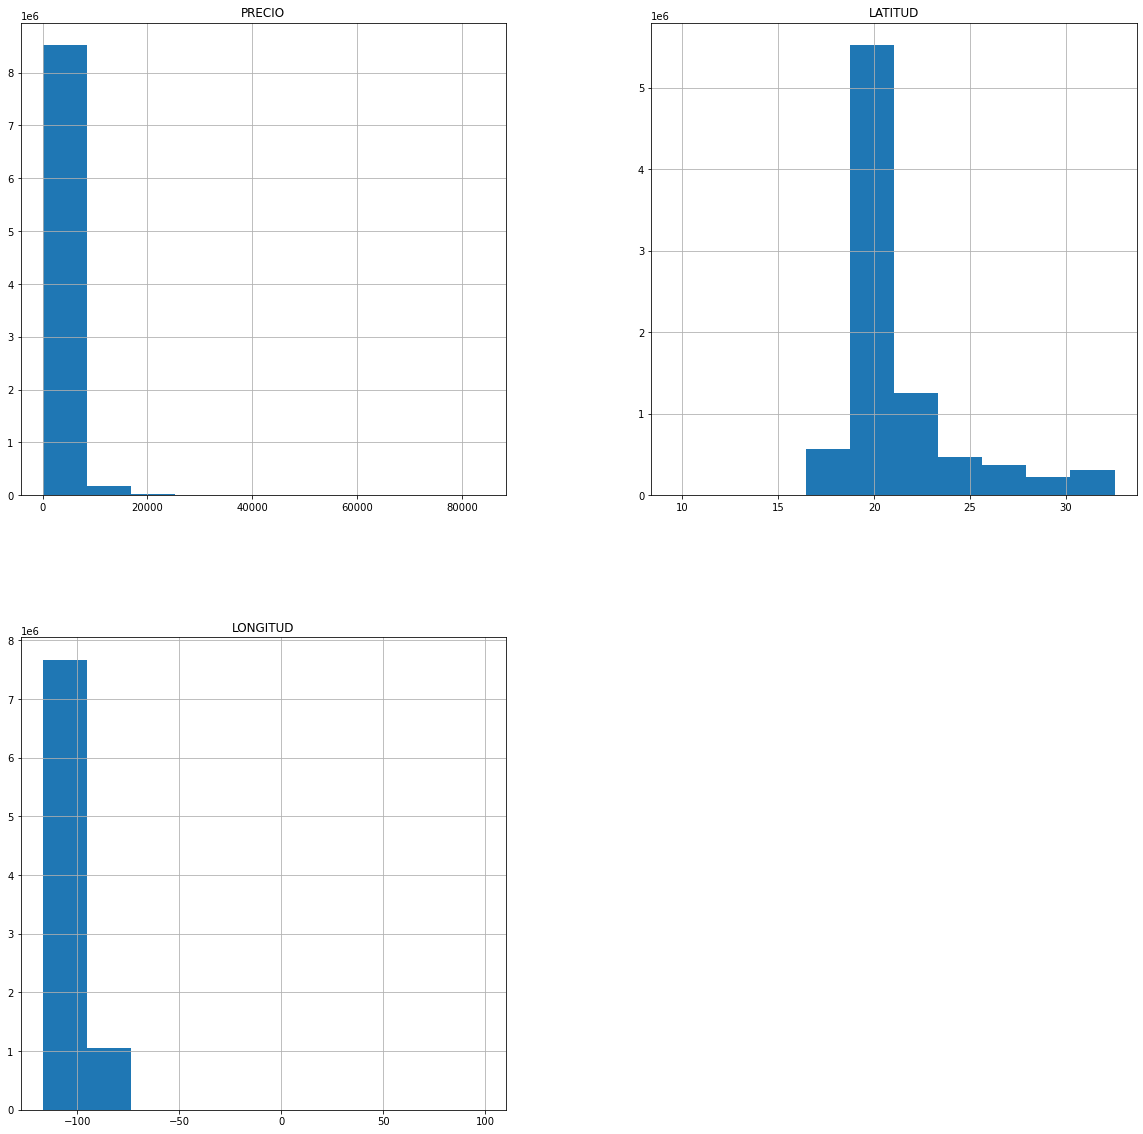

In [82]:
df_union.hist(figsize=(20,20))

In [ ]:
sns.heatmap(df_union.corr(), cmap='seismic', annot=True)

In [ ]:
# Tamaño del motor como posible variable de predicción del precio
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [ ]:
df_union.corr()

In [ ]:

import sweetviz as sv

# Genera el informe
report = sv.analyze(df_union)

# Guarda el informe en un archivo HTML
report.show_html("informe_bootcamp.html")


# 1 ¿Cuántos registros hay? 

In [83]:
cant= df_union.shape[0]
print("La cantidad de registros que hay es: ", cant)

La cantidad de registros que hay es:  8745162


Haz doble clic <b>aquí</b> para ver el resultado.

<!-- 

La cantidad de registros que hay es:  8206487

-->

# 2. ¿Cuántas categorías? 

In [84]:
list_cat= pd.DataFrame(df_union['CATEGORIA'].unique().tolist(), columns=['CATEGORIA'])
print("La cantidad de categorias que existen son:", list_cat.shape[0] )

La cantidad de categorias que existen son: 41


In [85]:
print("y son las siguientes:")

y son las siguientes:


In [86]:
list_cat

,CATEGORIA
0,MEDICAMENTOS
1,ACEITES Y GRASAS VEG. COMESTIBLES
2,PRODUCTOS DE TEMPORADA (NAVIDEÑOS)
3,HORTALIZAS FRESCAS
4,ARTS. PARA EL CUIDADO PERSONAL
5,REFRESCOS ENVASADOS
6,FRUTAS FRESCAS
7,FRUTAS Y LEGUMBRES PROCESADAS
8,GALLETAS PASTAS Y HARINAS DE TRIGO
9,ARROZ Y CEREALES PREPARADOS


Haz doble clic <b>aquí</b> para ver el resultado.

<!-- 

La cantidad de categorias que existen son: 41
['MEDICAMENTOS',
 'ACEITES Y GRASAS VEG. COMESTIBLES',
 'PRODUCTOS DE TEMPORADA (NAVIDEÑOS)',
 'HORTALIZAS FRESCAS',
 'ARTS. PARA EL CUIDADO PERSONAL',
 'REFRESCOS ENVASADOS',
 'FRUTAS FRESCAS',
 'FRUTAS Y LEGUMBRES PROCESADAS',
 'GALLETAS PASTAS Y HARINAS DE TRIGO',
 'ARROZ Y CEREALES PREPARADOS',
 'APARATOS ELECTRICOS',
 'PESCADOS Y MARISCOS EN CONSERVA',
 'ARTS. DE ESPARCIMIENTO (JUGUETES)',
 'AZUCAR',
 'APARATOS ELECTRONICOS',
 'DETERGENTES Y PRODUCTOS SIMILARES',
 'CHOCOLATES Y GOLOSINAS',
 'CAFE',
 'CARNE Y VISCERAS DE CERDO',
 'CARNE DE AVE',
 'CARNE Y VISCERAS DE RES',
 'CERVEZA',
 'CARNES FRIAS SECAS Y EMBUTIDOS',
 'CONDIMENTOS',
 'DERIVADOS DE LECHE',
 'LEGUMBRES SECAS',
 'HUEVO',
 'LECHE PROCESADA',
 'TORTILLAS Y DERIVADOS DEL MAIZ',
 'GRASAS ANIMALES COMESTIBLES',
 'UTENSILIOS DOMESTICOS',
 'PAN',
 'ARTS. DE PAPEL P/HIGIENE PERSONAL',
 'VINOS Y LICORES',
 'CIGARRILLOS',
 'ALIMENTOS COCINADOS F/CASA',
 'TE',
 'ACCESORIOS DOMESTICOS',
 'LECHE FRESCA',
 'PESCADOS Y MARISCOS',
 'MATERIAL ESCOLAR']

--></p>

# 3 ¿Cuántas cadenas comerciales están siendo monitoreadas (y, por lo tanto, reportadas en esa base de datos)? 

In [87]:
list_cad= pd.DataFrame(df_union['CADENACOMERCIAL'].unique().tolist(), columns=['CADENACOMERCIAL'])
print("La cantidad de cadenas comerciales que estan siendo monitoreadas son:", list_cad.shape[0] )

La cantidad de cadenas comerciales que estan siendo monitoreadas son: 253


In [88]:
print("y son las siguientes:" )
df_cadena = df_union['CADENACOMERCIAL'].value_counts().to_frame()
df_cadena.rename(columns={'CADENACOMERCIAL': 'value_counts'}, inplace=True)
df_cadena.index.name = 'CADENACOMERCIAL'
df_cadena

y son las siguientes:


,value_counts
CADENACOMERCIAL,
WAL-MART,1398870
BODEGA AURRERA,941288
HIPERMERCADO SORIANA,908272
MEGA SORIANA,737579
CHEDRAUI,677129
...,...
UNIFORMES EL LEON,16
PESA UNIFORMES,15
ZAPATERIAS 3 HERMANOS,15


Haz doble clic <b>aquí</b> para ver el resultado.

<!-- 

La cantidad de cadenas comerciales que estan siendo monitoreadas son: 253

-->

# 4 ¿Cuáles son los productos más monitoreados en cada estado de la república?

In [89]:
df_moni = df_union[['PRODUCTO','ESTADO']]
grouped_moni = df_moni.groupby(['ESTADO', 'PRODUCTO']).size().reset_index(name='CONTEO_REPORTE')
produc_monit = grouped_moni.groupby('ESTADO').apply(lambda x: x.nlargest(3, 'CONTEO_REPORTE')).reset_index(drop=True)

In [90]:
print("Aqui hay una lista de los 3 productos más minitoreados en cada estado de la republica:")
produc_monit

Aqui hay una lista de los 3 productos más minitoreados en cada estado de la republica:


,ESTADO,PRODUCTO,CONTEO_REPORTE
0,AGUASCALIENTES,REFRESCO,3549
1,AGUASCALIENTES,TOALLA FEMENINA,3355
2,AGUASCALIENTES,JAMON,2875
3,BAJA CALIFORNIA,REFRESCO,3306
4,BAJA CALIFORNIA,PASTA PARA SOPA,1803
...,...,...,...
85,YUCATÁN,JAMON,3662
86,YUCATÁN,TOALLA FEMENINA,3619
87,ZACATECAS,REFRESCO,6063
88,ZACATECAS,TOALLA FEMENINA,5090


Haz doble clic <b>aquí</b> para ver el resultado.

<!-- 

En aguascaliente por ejemplo los dos productos más monitoreados son el REFRESCO, TOALLAS FEMENINAS y JAMON con mayor reporte en esta base de datos
	ESTADO	PRODUCTO	CONTEO_REPORTE
0	AGUASCALIENTES	REFRESCO	3549
1	AGUASCALIENTES	TOALLA FEMENINA	3355
2	AGUASCALIENTES	JAMON	2875
-->

# 5. ¿Cuál es la cadena comercial con mayor variedad de productos monitoreados?

In [93]:
df_cadena_p = df_union[["CADENACOMERCIAL","PRODUCTO"]]
grouped_cadena_p  = df_cadena_p.groupby('CADENACOMERCIAL')['PRODUCTO'].nunique().nlargest(1)
grouped_cadena_p

CADENACOMERCIAL
HIPERMERCADO SORIANA    751
Name: PRODUCTO, dtype: int64

In [92]:
print("La cadena comercial con mayor variedad de productos monitoreados es:",grouped_cadena_p.index[0] , "con",grouped_cadena_p.iloc[0],"variedad de productos")

La cadena comercial con mayor variedad de productos monitoreados es: HIPERMERCADO SORIANA con 751 variedad de productos


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

CADENACOMERCIAL
HIPERMERCADO SORIANA    751
La cadena comercial con mayor variedad de productos monitoreados es: HIPERMERCADO SORIANA con 751 variedad de productos

-->


<p>La cadena comercial con mayor variedad de productos monitoreados es: HIPERMERCADO SORIANA con 723 variedad de productos</p>

# 6. Encuentra algún dato curioso en los datos y comunícalo en un slide de powerpoint. 


In [94]:
df_gptest = df_union[['CATALOGO','PRODUCTO','ESTADO','PRECIO']]
df_group_one = df_gptest.groupby(['CATALOGO'],as_index=False).mean()
df_group_one.sort_values('PRECIO',ascending=False,ignore_index=True)

,CATALOGO,PRECIO
0,ELECTRODOMESTICOS,6939.833316
1,JUGUETES,903.379635
2,TENIS,611.947752
3,MEDICAMENTOS,490.170629
4,PESCADOS Y MARISCOS,197.533166
5,NAVIDEÑOS,141.376571
6,UTILES ESCOLARES,90.020060
7,MERCADOS,77.765075
8,BASICOS,65.094300
9,FRUTAS Y LEGUMBRES,42.263494


<p>En promedio, el tipo de catalogos que se encuentran entre los más costosos,
    según la base son ELECTRODOMESTICOS, JUGUETES y TENIS, mientras que los UTILES ESCOLARES están en la 5 posición , sin embargo las FRUTAS Y LEGUMBRES es uno de los más baratos, en la posicion 9.
</p>

<p>
Ahora analizando ‘CATALOGO’ y ‘ESTADO’ con respecto al PRECIO
</p>

In [95]:
# resultados del agrupamiento
df_gptest2 = df_union[['CATALOGO','PRODUCTO','ESTADO','PRECIO']]
grouped_test2 = df_gptest2.groupby(['CATALOGO','ESTADO'],as_index=False).mean()
grouped_pivot2 = grouped_test2.pivot(index='CATALOGO',columns='ESTADO')
grouped_pivot2 = grouped_pivot2.fillna(0) #rellena los valores faltantes con 0 
grouped_pivot2

PRECIO                                      \
ESTADO              AGUASCALIENTES BAJA CALIFORNIA BAJA CALIFORNIA SUR   
CATALOGO                                                                 
BASICOS                  64.702836       59.822440           66.831576   
ELECTRODOMESTICOS      7454.113892     8087.899233         6997.069679   
FRUTAS Y LEGUMBRES       39.707204       41.531559           44.810826   
JUGUETES                982.295440      724.327160         1073.985950   
MEDICAMENTOS            476.321669      494.274619          395.220835   
MERCADOS                 82.743598      119.005274           98.461452   
NAVIDEÑOS                 0.000000      153.939200            0.000000   
PACIC                    32.954762       33.057392           33.886655   
PESCADOS Y MARISCOS     179.948048      179.302186          207.492070   
TENIS                   243.375000      978.646465          994.142857   
UTILES ESCOLARES         79.191748      100.703754           84.989067   

                                                                             \
ESTADO                  CAMPECHE      CHIAPAS    CHIHUAHUA CIUDAD DE MÉXICO   
CATALOGO                                                                      
BASICOS                61.652276    51.265003    56.107547        68.766470   
ELECTRODOMESTICOS    6232.616195  9077.777908  8655.228073      6093.139766   
FRUTAS Y LEGUMBRES     38.924631    40.431593    43.512521        41.861050   
JUGUETES              899.031075   807.555556   817.532787       795.787729   
MEDICAMENTOS          414.722633   501.813875   521.732357       519.404070   
MERCADOS               78.912643   127.396764    66.289826        75.984468   
NAVIDEÑOS               0.000000     0.000000    22.900000        24.000000   
PACIC                  33.387550    33.725411    32.761189        34.138487   
PESCADOS Y MARISCOS   198.528571   170.641501   168.607469       216.451760   
TENIS                 242.461538   252.236842  1212.297872       441.029426   
UTILES ESCOLARES      124.853699    86.625608    74.984271       100.536036   

                                                                        ...  \
ESTADO              COAHUILA DE ZARAGOZA      DURANGO ESTADO DE MÉXICO  ...   
CATALOGO                                                                ...   
BASICOS                        61.927503    59.798023        66.795308  ...   
ELECTRODOMESTICOS            8230.775011  6904.585196      5995.734705  ...   
FRUTAS Y LEGUMBRES             43.120452    38.228945        42.281022  ...   
JUGUETES                      519.800000   993.616065       846.518927  ...   
MEDICAMENTOS                  543.717340   524.419029       501.806579  ...   
MERCADOS                       77.467443    98.848342        79.819026  ...   
NAVIDEÑOS                     208.000000     0.000000       222.000000  ...   
PACIC                          35.300281    35.418220        32.485383  ...   
PESCADOS Y MARISCOS           159.847309   169.035934       203.098181  ...   
TENIS                         921.840909   694.526316       242.179724  ...   
UTILES ESCOLARES              121.740259    80.322267        91.978248  ...   

                                                                           \
ESTADO              QUINTANA ROO SAN LUIS POTOSÍ     SINALOA       SONORA   
CATALOGO                                                                    
BASICOS                67.314431       67.307772   38.733087    60.373501   
ELECTRODOMESTICOS    7920.291464     8508.532617    0.000000  7318.791042   
FRUTAS Y LEGUMBRES     45.393569       44.044318   41.859902    45.091438   
JUGUETES             1031.629699     1089.751443    0.000000  1329.047885   
MEDICAMENTOS          461.528144      509.112235   79.500000   465.008455   
MERCADOS               87.640625       83.863164    0.000000    96.863087   
NAVIDEÑOS              97.933333        0.000000    0.000000     0.000000   
PACIC  

In [96]:
indice_max_precio = grouped_test2['PRECIO'].idxmax()
estado_mas_caro = grouped_test2.loc[indice_max_precio, 'ESTADO']
filas_estado_mas_caro = df_gptest2[df_gptest2['ESTADO'] == estado_mas_caro]
indice_max_precio_estado = filas_estado_mas_caro['PRECIO'].idxmax()
catalogo_mas_caro = filas_estado_mas_caro.loc[indice_max_precio_estado, 'CATALOGO']
print(f"El estado con el promedio del precio más alto es '{estado_mas_caro}' y corresponde al catálogo '{catalogo_mas_caro}'.")

El estado con el promedio del precio más alto es 'MICHOACÁN DE OCAMPO' y corresponde al catálogo 'ELECTRODOMESTICOS'.


#### ¿Cuál es catálago que tienen el mayor impacto en el precio del producto por estado?

##### Variables: CATALOGO y ESTADO contra PRECIO

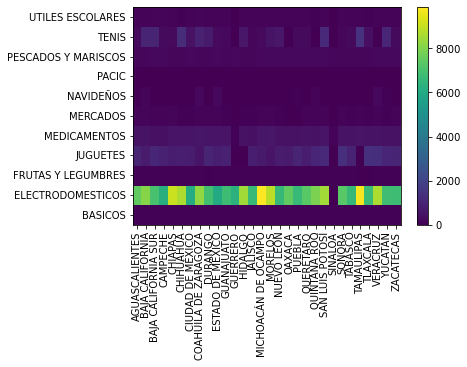

In [97]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot2, cmap='viridis')

# nombres de las etiquetas 
row_labels = grouped_pivot2.columns.levels[1]
col_labels = grouped_pivot2.index

# mover etiquetas al centro 
ax.set_xticks(np.arange(grouped_pivot2.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot2.shape[0]) + 0.5, minor=False)

# insertar etiquetas 
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotar las etiquetas si son muy largas 
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>
MICHOACÁN DE OCAMPO tiene en promedio el precio más costoso del catalogo de ELECTRODOMESTICOS, este catalogo es el más costoso en toda la república
</p>

In [98]:
df_gptest = df_union[['CATALOGO','ESTADO','PRODUCTO','PRECIO']]
cat_counts = df_gptest['CATALOGO'].value_counts().to_frame()
cat_counts.rename(columns={'CATALOGO': 'value_counts'}, inplace=True)
cat_counts.index.name = 'CATALOGO'
df_cate = cat_counts.sort_values('value_counts',ascending=False)
df_cate

,value_counts
CATALOGO,
BASICOS,4673938
MEDICAMENTOS,1907400
ELECTRODOMESTICOS,644629
FRUTAS Y LEGUMBRES,525198
PACIC,408852
UTILES ESCOLARES,281742
MERCADOS,200227
PESCADOS Y MARISCOS,86431
JUGUETES,15242


<p>Examinar los recuentos de valores del catalogo podria ser una buena variable predictiva del precio. Si tomo BASICOS vs NAVIDEÑOS, este resultado es sesgado por la diferencia de conteo. Por lo tanto, como dato de referencia podriamos tomar BASICOS, MEDICAMENTOS Y ELECTRODOMESTICOS para obtener una mejor conclusión sobre el tipo de catalogo, en futuros analisis.</p>

In [99]:
#xxxxx

<p>
Ahora analizando ‘CATALOGO’ y ‘PRODUCTO’ con respecto al PRECIO .
</p>

In [100]:
# resultados del agrupamiento
df_gptest1 = df_union[['CATALOGO','PRODUCTO','ESTADO','PRECIO']]
grouped_test1 = df_gptest1.groupby(['CATALOGO','PRODUCTO'],as_index=False).mean()
grouped_pivot = grouped_test1.pivot(index='CATALOGO',columns='PRODUCTO')
grouped_pivot = grouped_pivot.fillna(0) #rellena los valores faltantes con 0 
grouped_pivot

PRECIO                                        \
PRODUCTO                A.S.COR   ACARBOSA     ACEITE ACEITE DE OLIVA   
CATALOGO                                                                
BASICOS                0.000000   0.000000  55.418762      172.212188   
ELECTRODOMESTICOS      0.000000   0.000000   0.000000        0.000000   
FRUTAS Y LEGUMBRES     0.000000   0.000000   0.000000        0.000000   
JUGUETES               0.000000   0.000000   0.000000        0.000000   
MEDICAMENTOS         376.968488  79.834541   0.000000        0.000000   
MERCADOS               0.000000   0.000000  50.585167        0.000000   
NAVIDEÑOS              0.000000   0.000000   0.000000      181.970000   
PACIC                  0.000000   0.000000  41.001599        0.000000   
PESCADOS Y MARISCOS    0.000000   0.000000   0.000000        0.000000   
TENIS                  0.000000   0.000000   0.000000        0.000000   
UTILES ESCOLARES       0.000000   0.000000   0.000000        0.000000   

                                                                              \
PRODUCTO               ACEITUNA    ACELGA  ACICLOVIR ACIDO FOLICO  ACLIMAFEL   
CATALOGO                                                                       
BASICOS               59.676906  0.000000   0.000000     0.000000    0.00000   
ELECTRODOMESTICOS      0.000000  0.000000   0.000000     0.000000    0.00000   
FRUTAS Y LEGUMBRES     0.000000  8.209373   0.000000     0.000000    0.00000   
JUGUETES               0.000000  0.000000   0.000000     0.000000    0.00000   
MEDICAMENTOS           0.000000  0.000000  71.902852    21.866653  324.41022   
MERCADOS             109.228601  0.000000   0.000000     0.000000    0.00000   
NAVIDEÑOS             39.450000  0.000000   0.000000     0.000000    0.00000   
PACIC                  0.000000  0.000000   0.000000     0.000000    0.00000   
PESCADOS Y MARISCOS    0.000000  0.000000   0.000000     0.000000    0.00000   
TENIS                  0.000000  0.000000   0.000000     0.000000    0.00000   
UTILES ESCOLARES       0.000000  0.000000   0.000000     0.000000    0.00000   

                                               ...                        \
PRODUCTO            ACONDICIONADOR Y ENJUAGUE  ...      XL-3     XL-3 VR   
CATALOGO                                       ...                         
BASICOS                             72.657381  ...   0.00000    0.000000   
ELECTRODOMESTICOS                    0.000000  ...   0.00000    0.000000   
FRUTAS Y LEGUMBRES                   0.000000  ...   0.00000    0.000000   
JUGUETES                             0.000000  ...   0.00000    0.000000   
MEDICAMENTOS                         0.000000  ...  24.38139  102.725933   
MERCADOS                             0.000000  ...   0.00000    0.000000   
NAVIDEÑOS                            0.000000  ...   0.00000    0.000000   
PACIC                                0.000000  ...   0.00000    0.000000   
PESCADOS Y MARISCOS                  0.000000  ...   0.00000    0.000000   
TENIS                                0.000000  ...   0.00000    0.000000   
UTILES ESCOLARES                     0.000000  ...   0.00000    0.000000   

                                                                               \
PRODUCTO                 YASMIN YASMIN 24/4    YOGHURT      ZACTOS  ZANAHORIA   
CATALOGO                                                                        
BASICOS                0.000000    0.000000  22.396440    0.000000   0.000000   
ELECTRODOMESTICOS      0.000000    0.000000   0.000000    0.000000   0.000000   
FRUTAS Y LEGUMBRES     0.000000    0.000000   0.000000    0.000000  13.357238   
JUGUETES               0.000000    0.000000   0.000000    0.000000   0.000000   
MEDICAMENTOS         465.632206  486.607746   0.000000  420.332558   0.000000   
MERCADOS               0.000000    0.000000  12.268441    0.000000   0.000000   
NAVIDEÑOS              0.000000    0.000000   0.000000    0.000000   0.000000   
PACIC 

In [101]:
#indice_max_precio = grouped_test1['PRECIO'].idxmax()
#PROD_mas_caro = grouped_test1.loc[indice_max_precio, 'PRODUCTO']
#filas_estado_mas_caro = df_gptest1[df_gptest1['PRODUCTO'] == estado_mas_caro]
#indice_max_precio_estado = filas_estado_mas_caro['PRECIO'].idxmax()
#catalogo_mas_caro = filas_estado_mas_caro.loc[indice_max_precio_estado, 'CATALOGO']
#print(f"El estado con el promedio del precio más alto es '{estado_mas_caro}' y corresponde al catálogo '{catalogo_mas_caro}'.")